In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import f_oneway
import numpy as np







### Carga de dataset

In [54]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [55]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("data/fact_application_v2.csv")
df

applicationcode  redsecuritydensity  yellowsecuritydensity  \
0          app00035               0.038                  0.077   
1          app00032               0.014                  0.058   
2          app00036               0.000                  0.012   
3          app00031               0.000                  0.026   
4          app00033               0.016                  0.016   
..              ...                 ...                    ...   
648        app00882               0.069                  0.092   
649        app00069               0.000                  0.032   
650        app00068               0.000                  0.167   
651        app00066               0.000                  0.013   
652        app00067               0.014                  0.014   

     redfaulttolerancedensity  yellowfaulttolerancedensity  \
0                       0.000                        0.000   
1                       0.000                        0.029   
2                       0.000                        0.002   
3                       0.000                        0.051   
4                       0.000                        0.000   
..                        ...                          ...   
648                     0.023                        0.011   
649                     0.000                        0.016   
650                     0.000                        0.100   
651                     0.000                        0.000   
652                     0.000                        0.000   

     redperformancedensity  yellowperformancedensity  \
0                      0.0                     0.000   
1                      0.0                     0.000   
2                      0.0                     0.000   
3                      0.0                     0.000   
4                      0.0                     0.000   
..                     ...                       ...   
648                    0.0                     0.000   
649                    0.0                     0.000   
650                    0.0                     0.033   
651                    0.0                     0.000   
652                    0.0                     0.000   

     redcostoptimizingdensity  yellowcostoptimizingdensity  pdnresourcessize  
0                         0.0                          0.0             1.415  
1                         0.0                          0.0             1.839  
2                         0.0                          0.0             2.814  
3                         0.0                          0.0             1.591  
4                         0.0                          0.0             1.806  
..                        ...                          ...               ...  
648                       0.0                          0.0             1.940  
649                       0.0                          0.0             1.799  
650                       0.0                          0.0             1.477  
651                       0.0                          0.0             1.875  
652                       0.0                          0.0             1.845  

[653 rows x 10 columns]

In [56]:
df.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          653.000000             653.000000                653.000000   
mean             0.027322               0.090749                  0.005496   
std              0.068309               0.120340                  0.031505   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.015000                  0.000000   
50%              0.000000               0.053000                  0.000000   
75%              0.023000               0.108000                  0.000000   
max              0.667000               1.000000                  0.500000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   653.000000             653.000000   
mean                      0.045643               0.000028   
std                       0.078281               0.000501   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.021000               0.000000   
75%                       0.051000               0.000000   
max                       0.500000               0.010000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                653.000000                653.000000   
mean                   0.005798                  0.000020   
std                    0.019052                  0.000437   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.003000                  0.000000   
max                    0.250000                  0.011000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   653.000000        653.000000  
mean                      0.000544          1.622894  
std                       0.004374          0.669225  
min                       0.000000          0.301000  
25%                       0.000000          1.176000  
50%                       0.000000          1.785000  
75%                       0.000000          2.057000  
max                       0.061000          3.972000

In [57]:
# Porcentaje de 0s de cada columna
(df == 0).sum()/len(df) * 100

applicationcode                 0.000000
redsecuritydensity             50.382848
yellowsecuritydensity          16.385911
redfaulttolerancedensity       87.595712
yellowfaulttolerancedensity    30.627871
redperformancedensity          99.693721
yellowperformancedensity       73.813170
redcostoptimizingdensity       99.693721
yellowcostoptimizingdensity    97.549770
pdnresourcessize                0.000000
dtype: float64

In [58]:
df.dtypes

applicationcode                 object
redsecuritydensity             float64
yellowsecuritydensity          float64
redfaulttolerancedensity       float64
yellowfaulttolerancedensity    float64
redperformancedensity          float64
yellowperformancedensity       float64
redcostoptimizingdensity       float64
yellowcostoptimizingdensity    float64
pdnresourcessize               float64
dtype: object

Eliminamos las columnas que no aportan valor al modelo. En este caso estás columnas tienen un único valor, o son categorias que no pueden ser utilizadas en el modelo. La variable `applicationcode` es un identificador de cada aplicación desplegada, se deja en el dataset dado que puede ser utilizada para explicar el modelo y dar interpretabilidad a los clusters generados.

# Analisis de los datos
Esta etapa se encarga de analizar los datos para encontrar tendencias, correlaciones y patrones. En esta etapa se pueden utilizar herramientas de visualización de datos para ayudar a identificar las características más importantes.

En total tenemos 24 caracteristicas cuantitativas y un identificador de cada aplicación.

In [59]:
# Paso 2 - Selección de características

# features = ['fullresourcescount','devresourcescount','qaresourcescount','pdnresourcescount','fullaccountscount','devaccountscount','qaaccountscount','pdnaccountscount','redsecuritycheckscount','redsecurityresourcescount']

features = ['RedSecurityChecksCount', 'RedSecurityResourcesCount',
            'YellowSecurityChecksCount', 'YellowSecurityResourcesCount',
            'RedFaultToleranceChecksCount', 'RedFaultToleranceResourcesCount',
            'YellowFaultToleranceChecksCount', 'YellowFaultToleranceResourcesCount',
            'RedPerformanceChecksCount', 'RedPerformanceResourcesCount',
            'YellowPerformanceChecksCount', 'YellowPerformanceResourcesCount',
            'RedCostOptimizingChecksCount', 'RedCostOptimizingResourcesCount',
            'YellowCostOptimizingChecksCount', 'YellowCostOptimizingResourcesCount'
           ]

features = df.columns.to_list()
# remove from features values applicationcode, snapshot_date, provider_id, organization_id and application_id
features.remove('applicationcode')



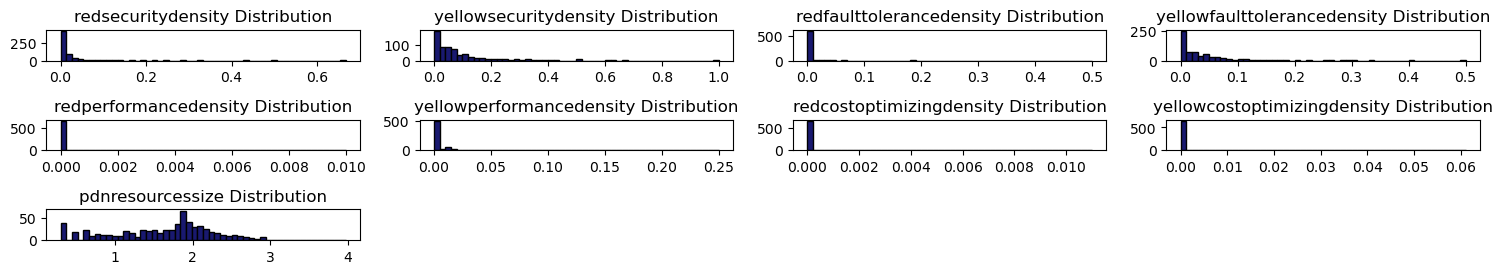

In [60]:
draw_histograms(df, features, 9, 4)

In [61]:
df[features].describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          653.000000             653.000000                653.000000   
mean             0.027322               0.090749                  0.005496   
std              0.068309               0.120340                  0.031505   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.015000                  0.000000   
50%              0.000000               0.053000                  0.000000   
75%              0.023000               0.108000                  0.000000   
max              0.667000               1.000000                  0.500000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   653.000000             653.000000   
mean                      0.045643               0.000028   
std                       0.078281               0.000501   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.021000               0.000000   
75%                       0.051000               0.000000   
max                       0.500000               0.010000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                653.000000                653.000000   
mean                   0.005798                  0.000020   
std                    0.019052                  0.000437   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.003000                  0.000000   
max                    0.250000                  0.011000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   653.000000        653.000000  
mean                      0.000544          1.622894  
std                       0.004374          0.669225  
min                       0.000000          0.301000  
25%                       0.000000          1.176000  
50%                       0.000000          1.785000  
75%                       0.000000          2.057000  
max                       0.061000          3.972000

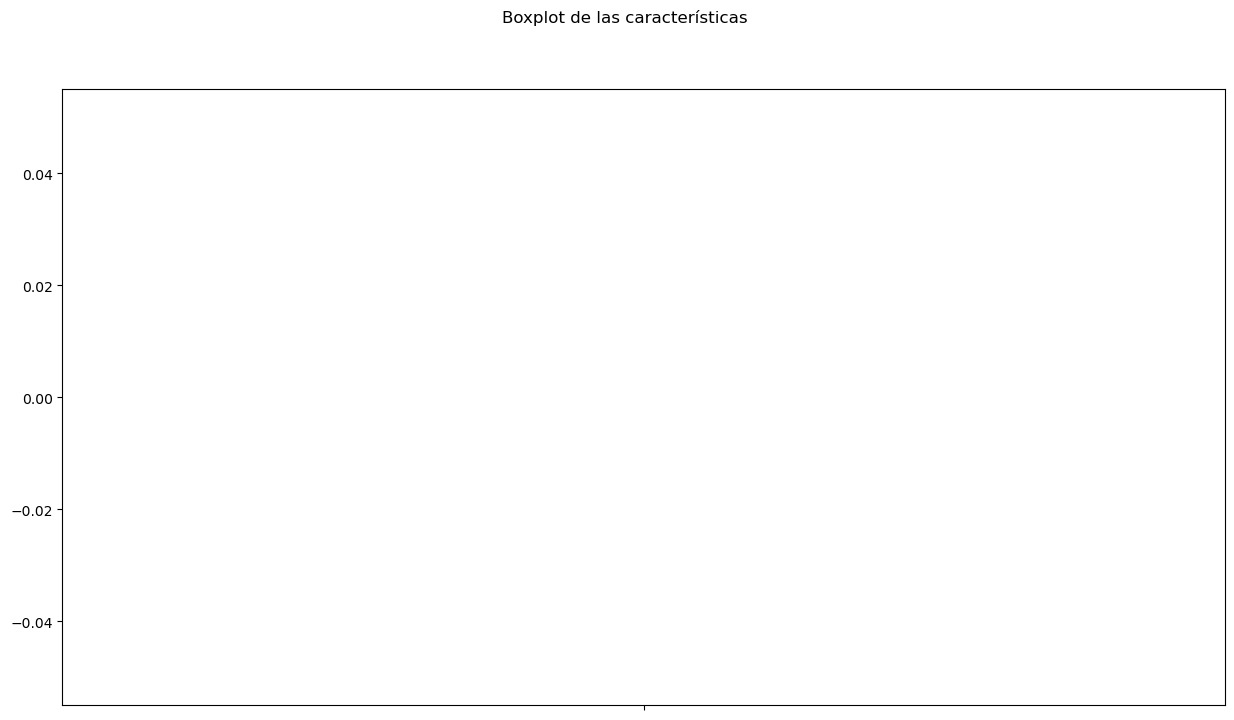

In [62]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df[df.filter(regex='^Red|Yellow').columns])
ax.set_xticklabels(df[df.filter(regex='^Red|Yellow').columns].columns, rotation=90)
plt.show()

In [63]:
# get features where 75% is zero
features_to_remove = []
for feature in features:
    if df[feature].describe()['75%'] == 0:
        features_to_remove.append(feature)

features_to_remove

['redfaulttolerancedensity',
 'redperformancedensity',
 'redcostoptimizingdensity',
 'yellowcostoptimizingdensity']

Hay muchas caracteristicas con más del 75% de los datos en cero, esto puede generar mucho ruido al modelo por lo que deben tratarse. Estas marcas en cero corresponden a aplicaciones que no cuentan con checks en rojo o amarillo para el pilar definido. 
<br> Vamos a separa un dataframe por pilar para ver el comportamiento de los datos.

## Separación por pilar Security

In [64]:
# general features
df_accounts = df.filter(regex='Account')
df_resources = df.filter(regex='(Full|Dev|Qa|Pdn)ResourcesCount')
# create dataframe only with columns that contains SecurityChecksCount in the name
df_sec = df.filter(regex='Security')
#df_sec = pd.concat([df['applicationcode'], df_resources, df_accounts, df_sec], axis=1)
# enfocandose en solo produccion
df_sec = pd.concat([df['applicationcode'], df['PdnResourcesCount'], df['PdnAccountsCount'], df_sec], axis=1)

df_sec

KeyError: 'PdnResourcesCount'

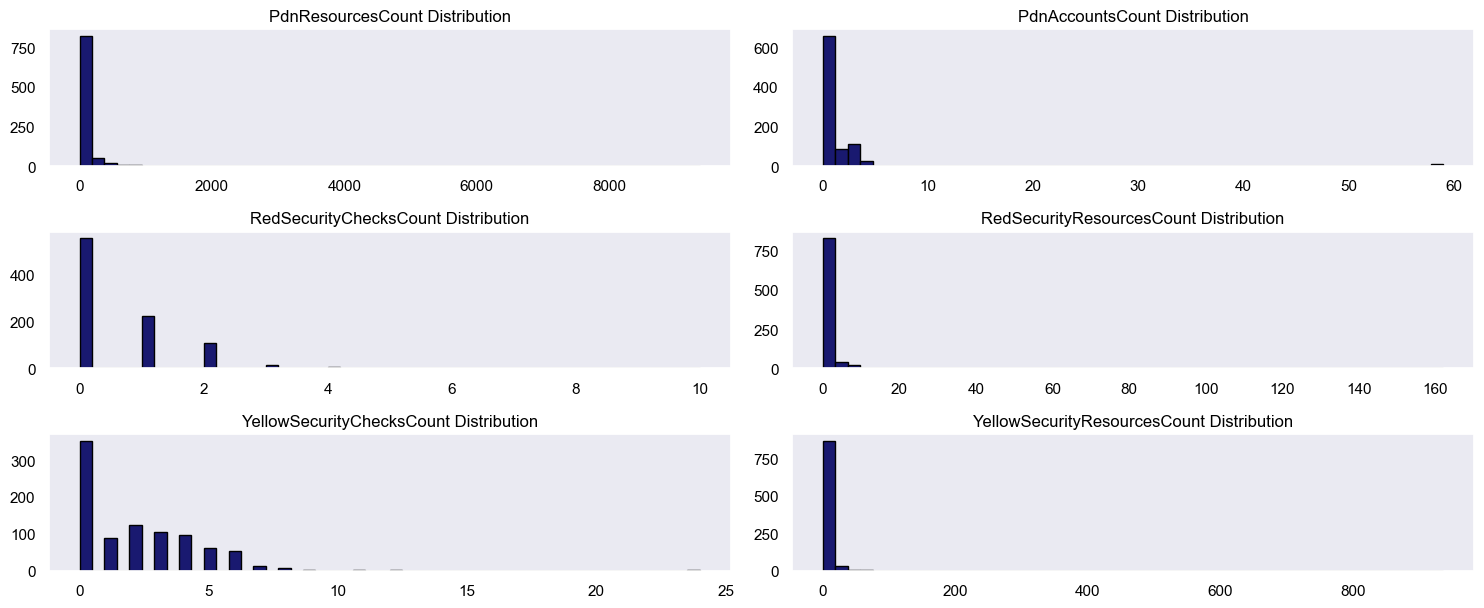

In [ ]:
sec_features = df_sec.columns.to_list()
sec_features.remove('applicationcode')
draw_histograms(df_sec, sec_features, 4, 2)

Para las aplicaciones que no tienen checks los campos ChecksCount y ResourceCount serán igual a cero. Dicho de otra manera, si el ChecksCount es cero, el ResourceCount también lo será. Por lo tanto, se van a eliminar todas las aplicaciones cuyos checks de seguridad son cero, dado que no interesan para el análisis de las aplicaciones con checks de seguridad.

In [ ]:
# count zeros for every column
(df_sec == 0).sum()/len(df_sec) * 100

In [ ]:
# remove rows where YellowSecurityChecksCount is zero
print(df_sec.shape)
df_sec = df_sec[df_sec['YellowSecurityChecksCount'] != 0]
df_sec = df_sec[df_sec['RedSecurityChecksCount'] != 0]

print(df_sec.shape)


(912, 7)
(353, 7)


Quedán 353 aplicaciones después de realizar el filtro, vamos a ver el histograma para ver la nueva distribución.

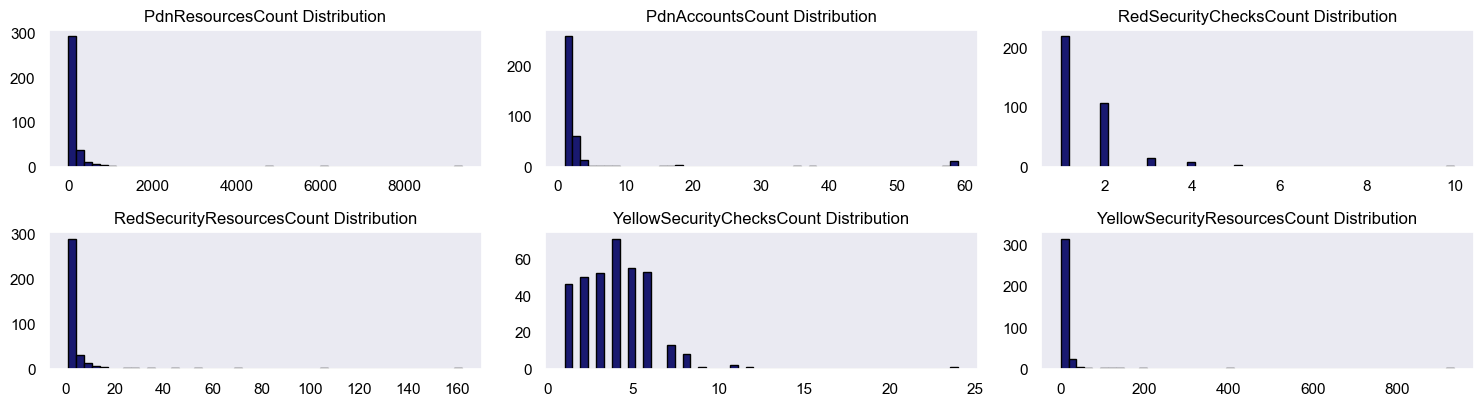

In [ ]:
draw_histograms(df_sec, sec_features, 4, 3)

In [ ]:
df_sec.describe()

PdnResourcesCount  PdnAccountsCount  RedSecurityChecksCount  \
count         353.000000        353.000000              353.000000   
mean          175.784703          3.943343                1.504249   
std           653.438157         10.681982                0.863140   
min             1.000000          1.000000                1.000000   
25%            31.000000          1.000000                1.000000   
50%            77.000000          1.000000                1.000000   
75%           136.000000          3.000000                2.000000   
max          9369.000000         59.000000               10.000000   

       RedSecurityResourcesCount  YellowSecurityChecksCount  \
count                 353.000000                 353.000000   
mean                    4.359773                   3.968839   
std                    12.354759                   2.239025   
min                     1.000000                   1.000000   
25%                     1.000000                   2.000000   
50%                     2.000000                   4.000000   
75%                     3.000000                   5.000000   
max                   162.000000                  24.000000   

       YellowSecurityResourcesCount  
count                    353.000000  
mean                      14.895184  
std                       56.793364  
min                        1.000000  
25%                        3.000000  
50%                        7.000000  
75%                       12.000000  
max                      936.000000

Algunos diagramas de correlación entre variables

C:\Users\fede_\AppData\Local\Temp\ipykernel_24148\968516648.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sec.corr(), annot=True, cmap="YlGnBu")


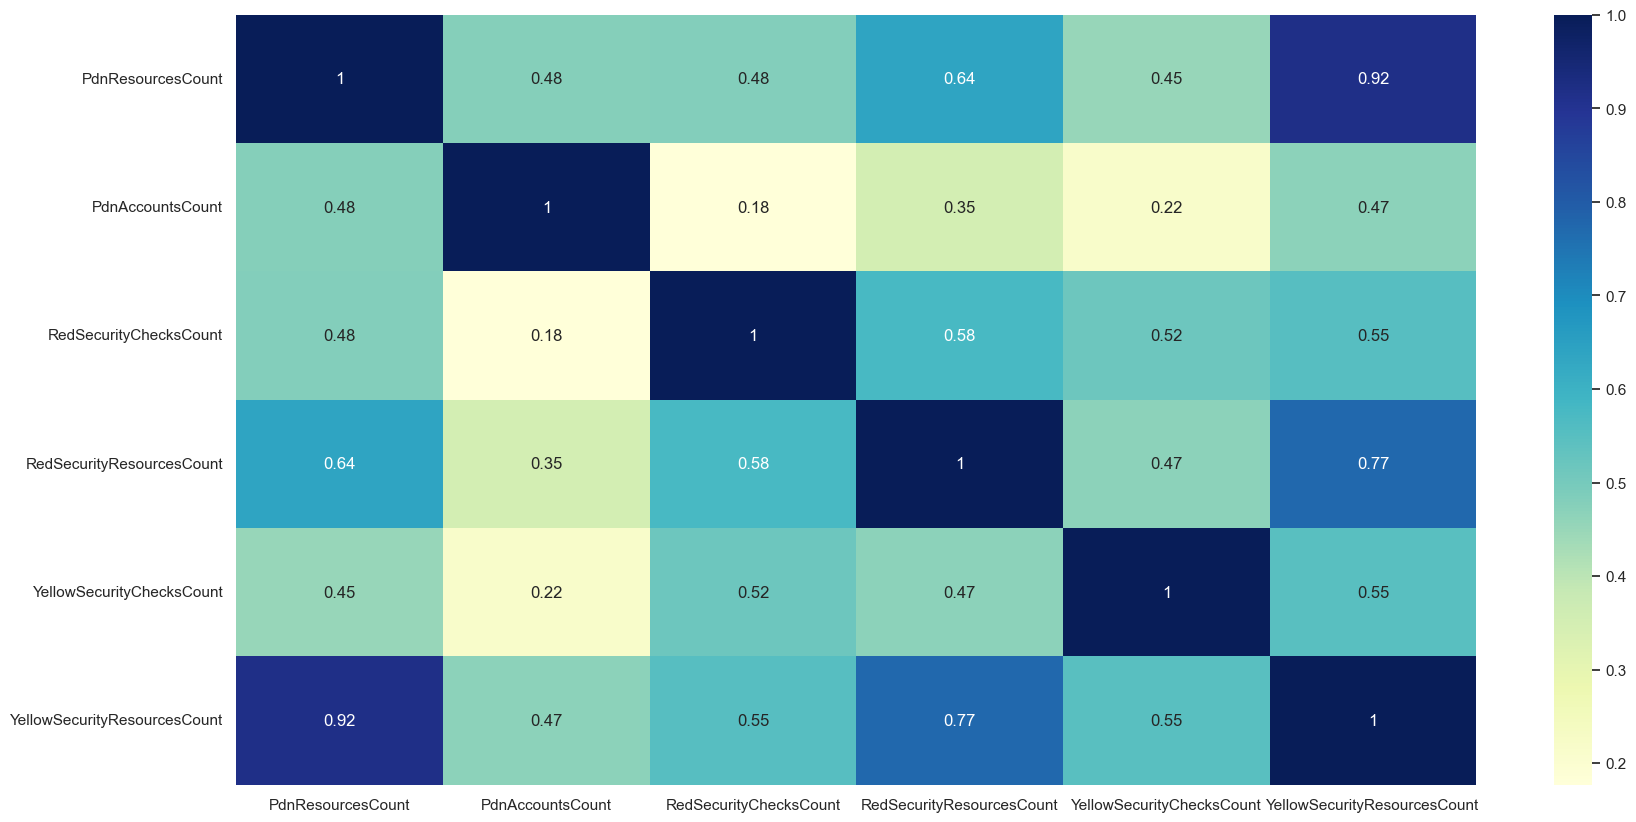

In [ ]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_sec.corr(), annot=True, cmap="YlGnBu")
plt.show()


Conclusiones aquí:
- Hay una correlación entre el conteo de recursos con checks amarillo y la cantidad de recursos por aplicación en Pdn. Es decir, la mayoria de aplicaciones en producción, tienen recursos con checks de riesgo medio.
- Hay una correlación entre los checks rojos y los checks amarillos para una aplicación.
- La información de las cuentas `PdnAccountsCount` donde esta desplegada la aplicación, no tiene mucha relación con los checks de seguridad marcados.


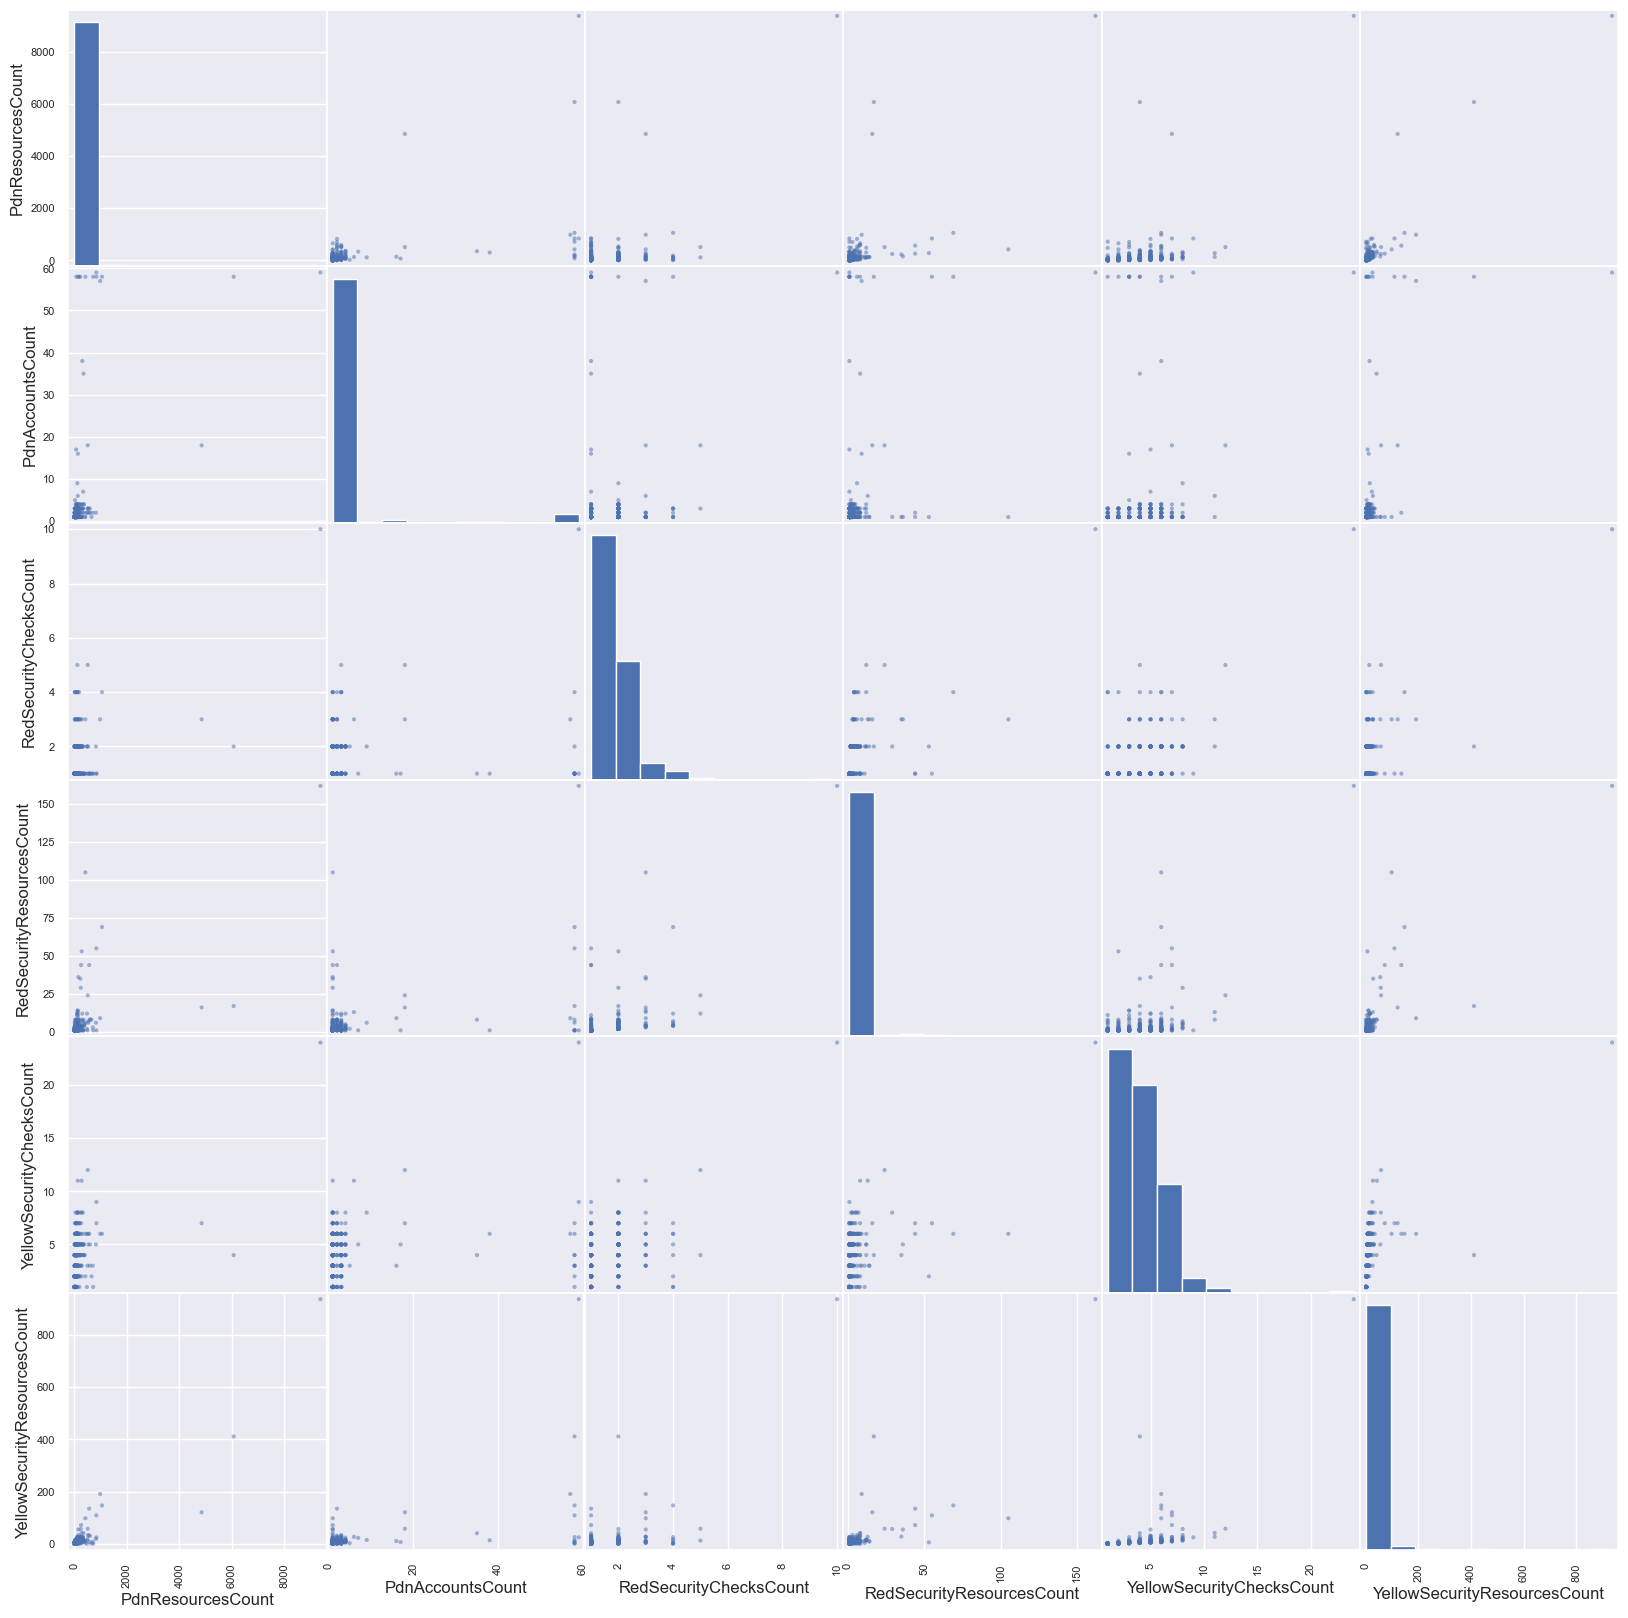

In [ ]:
# scatterplot matrix
scatter_matrix(df_sec, figsize=(20, 20))
plt.show()

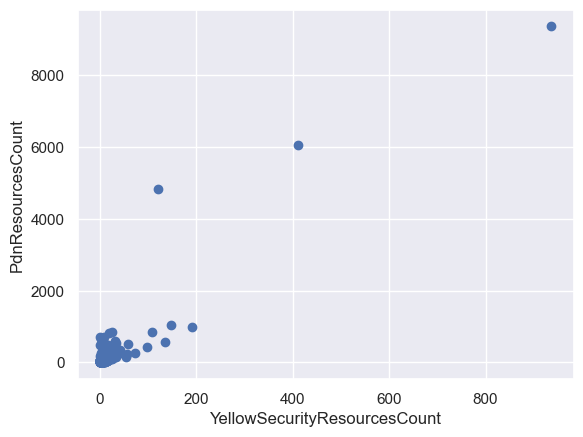

In [ ]:
# scatterplot between YellowSecurityResourcesCount and PdnResourcesCount
plt.scatter(df_sec['YellowSecurityResourcesCount'], df_sec['PdnResourcesCount'])
plt.xlabel('YellowSecurityResourcesCount')
plt.ylabel('PdnResourcesCount')
plt.show()

Ejecutemos una clusterización solo para los checks de seguridad

In [ ]:
df_sec

applicationcode  PdnResourcesCount  PdnAccountsCount  \
0          app00609                182                 1   
2          app00610                 92                 3   
3          app00614                 27                 1   
8          app00586                839                59   
9          app00587                 42                 1   
..              ...                ...               ...   
903        app00089                 30                 1   
904        app00659                481                 2   
908        app00661                 24                 1   
909        app00658                 31                 2   
911        app00660                 81                 1   

     RedSecurityChecksCount  RedSecurityResourcesCount  \
0                         2                          3   
2                         1                          1   
3                         1                          1   
8                         1                          1   
9                         1                          1   
..                      ...                        ...   
903                       1                          2   
904                       2                         12   
908                       1                          1   
909                       2                          4   
911                       1                          1   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  
0                            5                            12  
2                            5                            11  
3                            4                            11  
8                            9                            25  
9                            7                            14  
..                         ...                           ...  
903                          1                             2  
904                          6                            15  
908                          4                            11  
909                          7                            10  
911                          4                             9  

[353 rows x 7 columns]

In [ ]:
# normalize data
scaler = StandardScaler()
df_sec_scaled = scaler.fit_transform(df_sec.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_sec_scaled = pd.DataFrame(df_sec_scaled, columns=df_sec.drop(columns=['applicationcode']).columns, index=df_sec.index)
#concat df_sec_scaled with applicationcode
df_sec_scaled = pd.concat([df_sec['applicationcode'], df_sec_scaled], axis=1)
df_sec_scaled

applicationcode  PdnResourcesCount  PdnAccountsCount  \
0          app00609           0.009525         -0.275934   
2          app00610          -0.128403         -0.088437   
3          app00614          -0.228018         -0.275934   
8          app00586           1.016403          5.161477   
9          app00587          -0.205030         -0.275934   
..              ...                ...               ...   
903        app00089          -0.223421         -0.275934   
904        app00659           0.467754         -0.182185   
908        app00661          -0.232616         -0.275934   
909        app00658          -0.221888         -0.182185   
911        app00660          -0.145261         -0.275934   

     RedSecurityChecksCount  RedSecurityResourcesCount  \
0                  0.575173                  -0.110217   
2                 -0.585033                  -0.272328   
3                 -0.585033                  -0.272328   
8                 -0.585033                  -0.272328   
9                 -0.585033                  -0.272328   
..                      ...                        ...   
903               -0.585033                  -0.191272   
904                0.575173                   0.619281   
908               -0.585033                  -0.272328   
909                0.575173                  -0.029162   
911               -0.585033                  -0.272328   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  
0                     0.461194                     -0.051050  
2                     0.461194                     -0.068683  
3                     0.013937                     -0.068683  
8                     2.250222                      0.178175  
9                     1.355708                     -0.015784  
..                         ...                           ...  
903                  -1.327834                     -0.227377  
904                   0.908451                      0.001848  
908                   0.013937                     -0.068683  
909                   1.355708                     -0.086315  
911                   0.013937                     -0.103948  

[353 rows x 7 columns]

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

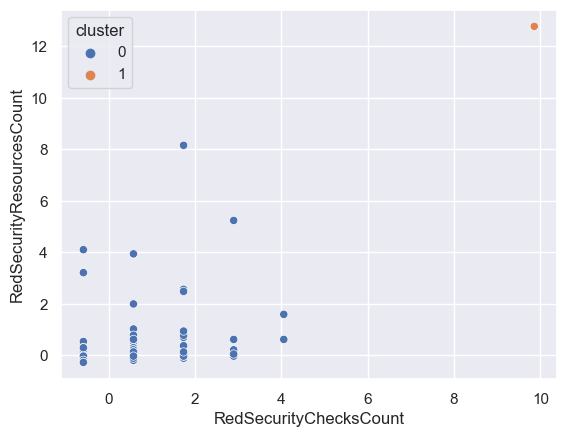

In [ ]:
# kmeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_sec_scaled.drop(columns=['applicationcode']))
kmeans.labels_

# add cluster column to df_sec_scaled
df_sec_scaled['cluster'] = kmeans.labels_
df_sec_scaled

# get cluster 0
df_cluster_0 = df_sec_scaled[df_sec_scaled['cluster'] == 0]
df_cluster_0

# get cluster 1
df_cluster_1 = df_sec_scaled[df_sec_scaled['cluster'] == 1]
df_cluster_1

# plot cluster 0
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df_sec_scaled, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="cluster", palette="deep")

In [ ]:
# analize clusters
df_cluster_0.describe()



PdnResourcesCount  PdnAccountsCount  RedSecurityChecksCount  \
count         352.000000        352.000000              352.000000   
mean           -0.040025         -0.014663               -0.028002   
std             0.662244          0.964149                0.853295   
min            -0.267864         -0.275934               -0.585033   
25%            -0.221888         -0.275934               -0.585033   
50%            -0.152158         -0.275934               -0.585033   
75%            -0.060972         -0.088437                0.575173   
max             9.025452          5.161477                4.055789   

       RedSecurityResourcesCount  YellowSecurityChecksCount  \
count                 352.000000                 352.000000   
mean                   -0.036300                  -0.025452   
std                     0.734322                   0.881120   
min                    -0.272328                  -1.327834   
25%                    -0.272328                  -0.880577   
50%                    -0.191272                   0.013937   
75%                    -0.110217                   0.461194   
max                     8.157430                   3.591993   

       YellowSecurityResourcesCount  cluster  
count                    352.000000    352.0  
mean                      -0.046141      0.0  
std                        0.502026      0.0  
min                       -0.245009      0.0  
25%                       -0.209744      0.0  
50%                       -0.139213      0.0  
75%                       -0.051050      0.0  
max                        6.984391      0.0

In [ ]:
df_cluster_1.describe()

PdnResourcesCount  PdnAccountsCount  RedSecurityChecksCount  \
count           1.000000          1.000000                1.000000   
mean           14.088961          5.161477                9.856816   
std                  NaN               NaN                     NaN   
min            14.088961          5.161477                9.856816   
25%            14.088961          5.161477                9.856816   
50%            14.088961          5.161477                9.856816   
75%            14.088961          5.161477                9.856816   
max            14.088961          5.161477                9.856816   

       RedSecurityResourcesCount  YellowSecurityChecksCount  \
count                   1.000000                   1.000000   
mean                   12.777585                   8.959078   
std                          NaN                        NaN   
min                    12.777585                   8.959078   
25%                    12.777585                   8.959078   
50%                    12.777585                   8.959078   
75%                    12.777585                   8.959078   
max                    12.777585                   8.959078   

       YellowSecurityResourcesCount  cluster  
count                       1.00000      1.0  
mean                       16.24155      1.0  
std                             NaN      NaN  
min                        16.24155      1.0  
25%                        16.24155      1.0  
50%                        16.24155      1.0  
75%                        16.24155      1.0  
max                        16.24155      1.0

In [ ]:
# export to csv
df_sec_scaled.to_csv('df_sec_clusters.csv', index=False)

Genero un cluster con un elemento, debido a que es un atípico y no se encontraron más vecinos en el algoritmo. Rapidamente se podría inferir que los dos grupos aquí corresponden a aplicaciones con muchos (más de 5) checks de seguridad y aplicaciones con pocos (menos de 5) checks de seguridad. 
<br> Probemos con eliminación de atípicos.

In [ ]:
df_sec.describe()

PdnResourcesCount  PdnAccountsCount  RedSecurityChecksCount  \
count         353.000000        353.000000              353.000000   
mean          175.784703          3.943343                1.504249   
std           653.438157         10.681982                0.863140   
min             1.000000          1.000000                1.000000   
25%            31.000000          1.000000                1.000000   
50%            77.000000          1.000000                1.000000   
75%           136.000000          3.000000                2.000000   
max          9369.000000         59.000000               10.000000   

       RedSecurityResourcesCount  YellowSecurityChecksCount  \
count                 353.000000                 353.000000   
mean                    4.359773                   3.968839   
std                    12.354759                   2.239025   
min                     1.000000                   1.000000   
25%                     1.000000                   2.000000   
50%                     2.000000                   4.000000   
75%                     3.000000                   5.000000   
max                   162.000000                  24.000000   

       YellowSecurityResourcesCount  
count                    353.000000  
mean                      14.895184  
std                       56.793364  
min                        1.000000  
25%                        3.000000  
50%                        7.000000  
75%                       12.000000  
max                      936.000000

In [ ]:
# remove outliers from df_sec
print(df_sec.shape)
df_sec = df_sec[df_sec['RedSecurityChecksCount'] < 10]
df_sec = df_sec[df_sec['YellowSecurityChecksCount'] < 10]
print(df_sec.shape)

(353, 7)
(349, 7)


In [ ]:
df_sec.describe()

PdnResourcesCount  PdnAccountsCount  RedSecurityChecksCount  \
count         349.000000        349.000000              349.000000   
mean          148.335244          3.747851                1.464183   
std           433.500440         10.298673                0.708735   
min             1.000000          1.000000                1.000000   
25%            31.000000          1.000000                1.000000   
50%            76.000000          1.000000                1.000000   
75%           135.000000          3.000000                2.000000   
max          6065.000000         59.000000                5.000000   

       RedSecurityResourcesCount  YellowSecurityChecksCount  \
count                 349.000000                 349.000000   
mean                    3.816619                   3.848138   
std                     9.018223                   1.853043   
min                     1.000000                   1.000000   
25%                     1.000000                   2.000000   
50%                     2.000000                   4.000000   
75%                     3.000000                   5.000000   
max                   105.000000                   9.000000   

       YellowSecurityResourcesCount  
count                    349.000000  
mean                      12.020057  
std                       28.431853  
min                        1.000000  
25%                        3.000000  
50%                        7.000000  
75%                       12.000000  
max                      411.000000

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

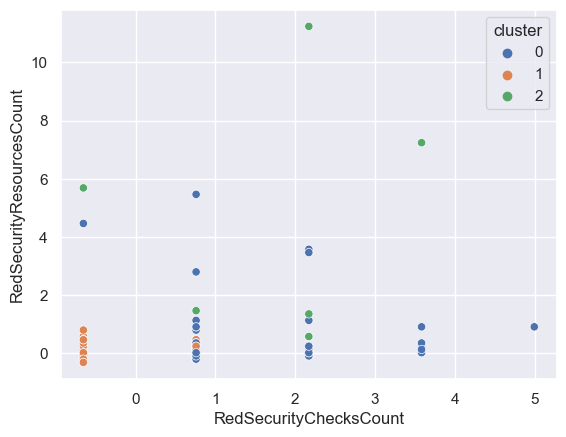

In [ ]:
# run kmeans again 
# normalize data
scaler = StandardScaler()
df_sec_scaled = scaler.fit_transform(df_sec.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_sec_scaled = pd.DataFrame(df_sec_scaled, columns=df_sec.drop(columns=['applicationcode']).columns, index=df_sec.index)
#concat df_sec_scaled with applicationcode
df_sec_scaled = pd.concat([df_sec['applicationcode'], df_sec_scaled], axis=1)

# kmeans with 2 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_sec_scaled.drop(columns=['applicationcode']))

# add cluster column to df_sec_scaled
df_sec_scaled['cluster'] = kmeans.labels_

# get cluster 0
df_cluster_0 = df_sec_scaled[df_sec_scaled['cluster'] == 0]

# get cluster 1
df_cluster_1 = df_sec_scaled[df_sec_scaled['cluster'] == 1]

# plot cluster 0
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df_sec_scaled, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="cluster", palette="deep")


De esta manera los clusters son mucho más variados y complejos de explicar. Aquí el desafio es la interpretabilidad. Este proceso debería hacerse para cada uno de los pilares. De aquí se extraen unos grupos, que pueden ser utilizados para entrenar un modelo de clasificación o se puede hacer una nueva clusterización.

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


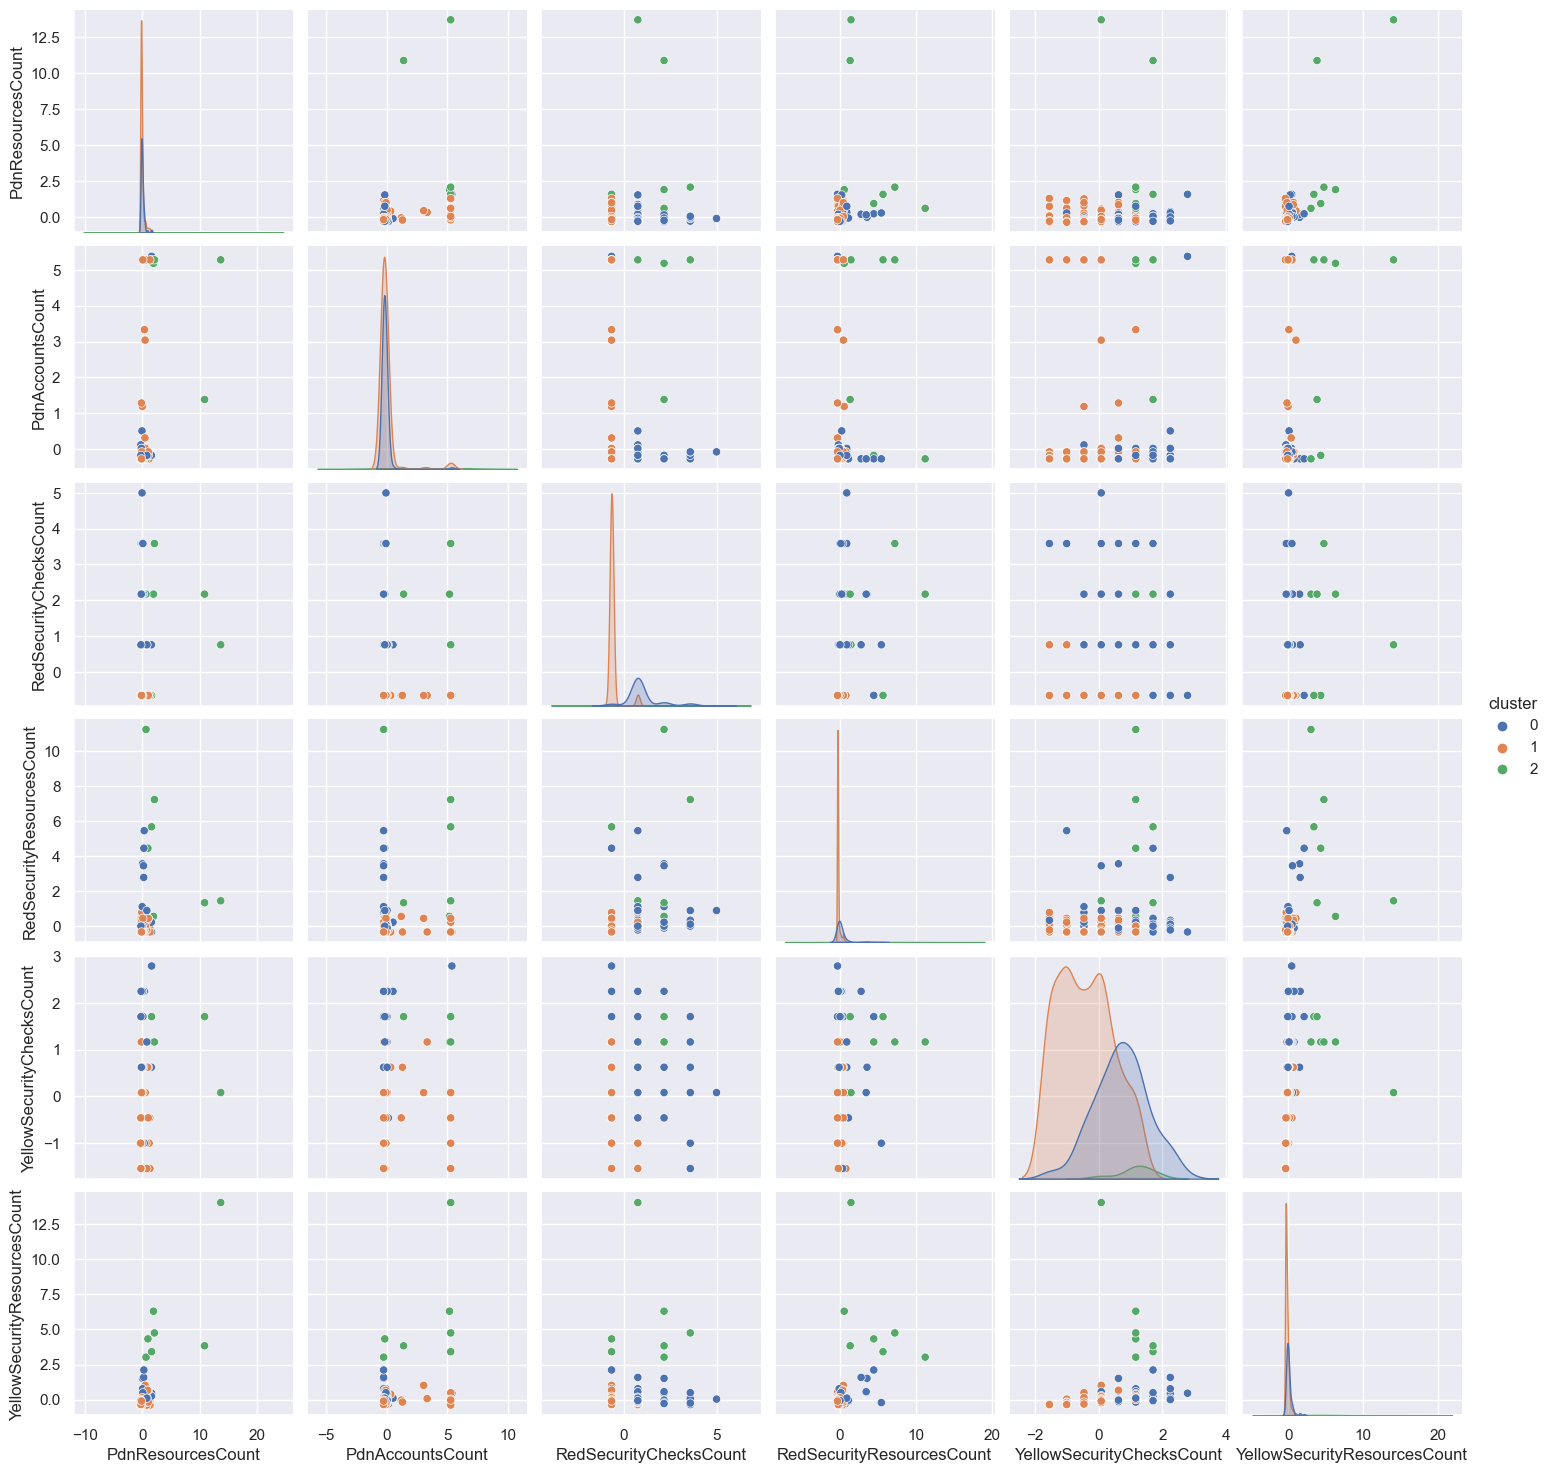

In [ ]:
# scatter_matrix using sns
sns.pairplot(df_sec_scaled, hue="cluster", palette="deep")
plt.show()

Los grupos que se forman por el conteo de recursos marcados `RedSecurityResourcesCount` y `YellowSecurityResourcesCount` muestran que se generan 3 grupos: uno con pocos recursos con checks, otro con muchos recursos con checks y otro con una cantidad intermedia de recursos con checks. Las variables de ChecksCount creo que no aporta mucho, porque poco importa si una aplicación tiene 2 o 10 checks de seguridad, lo que importa es la cantidad de recursos con checks de seguridad... la cantidad de diferentes checks marcados podría ser más una desviación.

In [ ]:
# export to csv
df_sec_scaled.to_csv('df_sec_clusters3.csv', index=False)

In [ ]:
# concat df_sec with clusters
df_sec = pd.concat([df_sec, df_sec_scaled['cluster']], axis=1)
df_sec


applicationcode  PdnResourcesCount  PdnAccountsCount  \
0          app00609                182                 1   
2          app00610                 92                 3   
3          app00614                 27                 1   
8          app00586                839                59   
9          app00587                 42                 1   
..              ...                ...               ...   
903        app00089                 30                 1   
904        app00659                481                 2   
908        app00661                 24                 1   
909        app00658                 31                 2   
911        app00660                 81                 1   

     RedSecurityChecksCount  RedSecurityResourcesCount  \
0                         2                          3   
2                         1                          1   
3                         1                          1   
8                         1                          1   
9                         1                          1   
..                      ...                        ...   
903                       1                          2   
904                       2                         12   
908                       1                          1   
909                       2                          4   
911                       1                          1   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  cluster  
0                            5                            12        0  
2                            5                            11        1  
3                            4                            11        1  
8                            9                            25        0  
9                            7                            14        0  
..                         ...                           ...      ...  
903                          1                             2        1  
904                          6                            15        0  
908                          4                            11        1  
909                          7                            10        0  
911                          4                             9        1  

[349 rows x 8 columns]

In [ ]:
# export csv
df_sec.to_csv('df_sec.csv', index=False)



## Cluster con k 5, solo checks
Vamos a hacer una clusterización teniendo en cuenta unicamente los checks.
- Solo datos de producción (682)
- Se ignora conteo de recursos y conteo de cuentas de la aplicación.
- Detección de atípicos
- KMeans con 3 y 5 clusters

In [ ]:
# remove from df those with 0 in PdnResourcesCount
print(df.shape)
df = df[df['PdnResourcesCount'] != 0]
print(df.shape)

(912, 25)
(682, 25)


In [ ]:
# create dataframe only with columns that contains SecurityChecksCount in the name
df_checks = df.filter(regex='(Security|FaultTolerance|Performance|CostOptimizing)')
#df_sec = pd.concat([df['applicationcode'], df_resources, df_accounts, df_sec], axis=1)
# enfocandose en solo produccion
df_checks = pd.concat([df['applicationcode'], df_checks], axis=1)

df_checks

applicationcode  RedSecurityChecksCount  RedSecurityResourcesCount  \
0          app00609                       2                          3   
2          app00610                       1                          1   
3          app00614                       1                          1   
4          app00612                       0                          0   
5          app00616                       0                          0   
..              ...                     ...                        ...   
906        app00657                       0                          0   
907        app00655                       0                          0   
908        app00661                       1                          1   
909        app00658                       2                          4   
911        app00660                       1                          1   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  \
0                            5                            12   
2                            5                            11   
3                            4                            11   
4                            2                             2   
5                            0                             0   
..                         ...                           ...   
906                          1                             1   
907                          0                             0   
908                          4                            11   
909                          7                            10   
911                          4                             9   

     RedFaultToleranceChecksCount  RedFaultToleranceResourcesCount  \
0                               0                                0   
2                               1                                1   
3                               0                                0   
4                               1                                1   
5                               0                                0   
..                            ...                              ...   
906                             0                                0   
907                             0                                0   
908                             0                                0   
909                             0                                0   
911                             0                                0   

     YellowFaultToleranceChecksCount  YellowFaultToleranceResourcesCount  \
0                                  2                                   5   
2                                  1                                   2   
3                                  1                                   1   
4                                  3                                   9   
5                                  0                                   0   
..                               ...                                 ...   
906                                0                                   0   
907                                0                                   0   
908                                3                                   5   
909                                1                                   2   
911                                1                                   3   

     RedPerformanceChecksCount  RedPerformanceResourcesCount  \
0                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   
5                            0                             0   
..                         ...                           ...   
906                          0                             0   
907                          0                             0   
908             

In [ ]:
df_checks.describe()

RedSecurityChecksCount  RedSecurityResourcesCount  \
count              682.000000                 682.000000   
mean                 0.790323                   2.272727   
std                  0.974729                   9.143920   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  1.000000                   1.000000   
75%                  1.000000                   2.000000   
max                 10.000000                 162.000000   

       YellowSecurityChecksCount  YellowSecurityResourcesCount  \
count                 682.000000                    682.000000   
mean                    2.802053                      9.611437   
std                     2.271019                     42.193980   
min                     0.000000                      0.000000   
25%                     1.000000                      1.000000   
50%                     3.000000                      4.000000   
75%                     4.000000                      8.750000   
max                    24.000000                    936.000000   

       RedFaultToleranceChecksCount  RedFaultToleranceResourcesCount  \
count                    682.000000                       682.000000   
mean                       0.142229                         0.791789   
std                        0.385500                         5.598200   
min                        0.000000                         0.000000   
25%                        0.000000                         0.000000   
50%                        0.000000                         0.000000   
75%                        0.000000                         0.000000   
max                        3.000000                        95.000000   

       YellowFaultToleranceChecksCount  YellowFaultToleranceResourcesCount  \
count                       682.000000                          682.000000   
mean                          0.972141                            3.290323   
std                           0.903957                           10.999701   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           1.000000                            2.000000   
75%                           1.000000                            3.000000   
max                           4.000000                          227.000000   

       RedPerformanceChecksCount  RedPerformanceResourcesCount  \
count                 682.000000                    682.000000   
mean                    0.002933                      0.002933   
std                     0.054113                      0.054113   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     0.000000                      0.000000   
max                     1.000000                      1.000000   

       YellowPerformanceChecksCount  YellowPerformanceResourcesCount  \
count                    682.000000                       682.000000   
mean                       0.296188                         0.507331   
std                        0.539443                         1.972819   
min                        0.000000                         0.000000   
25%                        0.000000                         0.000000   
50%                        0.000000                         0.000000   
75%                        1.000000                         1.000000   
max                        3.000000                        41.000000   

       RedCostOptimizingChecksCount  RedCostOptimizingResourcesCount  \
count                    682.000000                       682.000000   
mean                       0.002933                         0.002933   
std                        0.054113                        

In [ ]:
# normalize data
scaler = StandardScaler()
df_checks_scaled = scaler.fit_transform(df_checks.drop(columns=['applicationcode']))
# index to keep the index of df_sec
df_checks_scaled = pd.DataFrame(df_checks_scaled, columns=df_checks.drop(columns=['applicationcode']).columns, index=df_checks.index)
#concat df_sec_scaled with applicationcode
df_checks_scaled = pd.concat([df_checks['applicationcode'], df_checks_scaled], axis=1)
df_checks_scaled

applicationcode  RedSecurityChecksCount  RedSecurityResourcesCount  \
0          app00609                1.241950                   0.079595   
2          app00610                0.215271                  -0.139291   
3          app00614                0.215271                  -0.139291   
4          app00612               -0.811408                  -0.248733   
5          app00616               -0.811408                  -0.248733   
..              ...                     ...                        ...   
906        app00657               -0.811408                  -0.248733   
907        app00655               -0.811408                  -0.248733   
908        app00661                0.215271                  -0.139291   
909        app00658                1.241950                   0.189037   
911        app00660                0.215271                  -0.139291   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  \
0                     0.968534                      0.056651   
2                     0.968534                      0.032933   
3                     0.527880                      0.032933   
4                    -0.353428                     -0.180524   
5                    -1.234736                     -0.227959   
..                         ...                           ...   
906                  -0.794082                     -0.204241   
907                  -1.234736                     -0.227959   
908                   0.527880                      0.032933   
909                   1.849843                      0.009216   
911                   0.527880                     -0.014502   

     RedFaultToleranceChecksCount  RedFaultToleranceResourcesCount  \
0                       -0.369217                         -0.14154   
2                        2.226718                          0.03722   
3                       -0.369217                         -0.14154   
4                        2.226718                          0.03722   
5                       -0.369217                         -0.14154   
..                            ...                              ...   
906                     -0.369217                         -0.14154   
907                     -0.369217                         -0.14154   
908                     -0.369217                         -0.14154   
909                     -0.369217                         -0.14154   
911                     -0.369217                         -0.14154   

     YellowFaultToleranceChecksCount  YellowFaultToleranceResourcesCount  \
0                           1.137902                            0.155544   
2                           0.030842                           -0.117391   
3                           0.030842                           -0.208370   
4                           2.244961                            0.519457   
5                          -1.076218                           -0.299348   
..                               ...                                 ...   
906                        -1.076218                           -0.299348   
907                        -1.076218                           -0.299348   
908                         2.244961                            0.155544   
909                         0.030842                           -0.117391   
911                         0.030842                           -0.026413   

     RedPerformanceChecksCount  RedPerformanceResourcesCount  \
0                    -0.054233                     -0.054233   
2                    -0.054233                     -0.054233   
3                    -0.054233                     -0.054233   
4                    -0.054233                     -0.054233   
5                    -0.054233                     -0.054233   
..                         ...                           ...   
906                  -0.054233                     -0.054233   
907                  -0.054233                     -0.054233   
908             

In [ ]:
# run kmens with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=232).fit(df_checks_scaled.drop(columns=['applicationcode']))

# add cluster column to df_sec_scaled
df_checks_scaled['cluster'] = kmeans.labels_

# concat with df_checks
df_checks = pd.concat([df_checks, df_checks_scaled['cluster']], axis=1)

df_checks

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


applicationcode  RedSecurityChecksCount  RedSecurityResourcesCount  \
0          app00609                       2                          3   
2          app00610                       1                          1   
3          app00614                       1                          1   
4          app00612                       0                          0   
5          app00616                       0                          0   
..              ...                     ...                        ...   
906        app00657                       0                          0   
907        app00655                       0                          0   
908        app00661                       1                          1   
909        app00658                       2                          4   
911        app00660                       1                          1   

     YellowSecurityChecksCount  YellowSecurityResourcesCount  \
0                            5                            12   
2                            5                            11   
3                            4                            11   
4                            2                             2   
5                            0                             0   
..                         ...                           ...   
906                          1                             1   
907                          0                             0   
908                          4                            11   
909                          7                            10   
911                          4                             9   

     RedFaultToleranceChecksCount  RedFaultToleranceResourcesCount  \
0                               0                                0   
2                               1                                1   
3                               0                                0   
4                               1                                1   
5                               0                                0   
..                            ...                              ...   
906                             0                                0   
907                             0                                0   
908                             0                                0   
909                             0                                0   
911                             0                                0   

     YellowFaultToleranceChecksCount  YellowFaultToleranceResourcesCount  \
0                                  2                                   5   
2                                  1                                   2   
3                                  1                                   1   
4                                  3                                   9   
5                                  0                                   0   
..                               ...                                 ...   
906                                0                                   0   
907                                0                                   0   
908                                3                                   5   
909                                1                                   2   
911                                1                                   3   

     RedPerformanceChecksCount  RedPerformanceResourcesCount  \
0                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   
5                            0                             0   
..                         ...                           ...   
906                          0                             0   
907                          0                             0   
908             

In [ ]:
# count of clusters
df_checks_scaled['cluster'].value_counts()


1    436
3    233
0      9
2      2
4      2
Name: cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


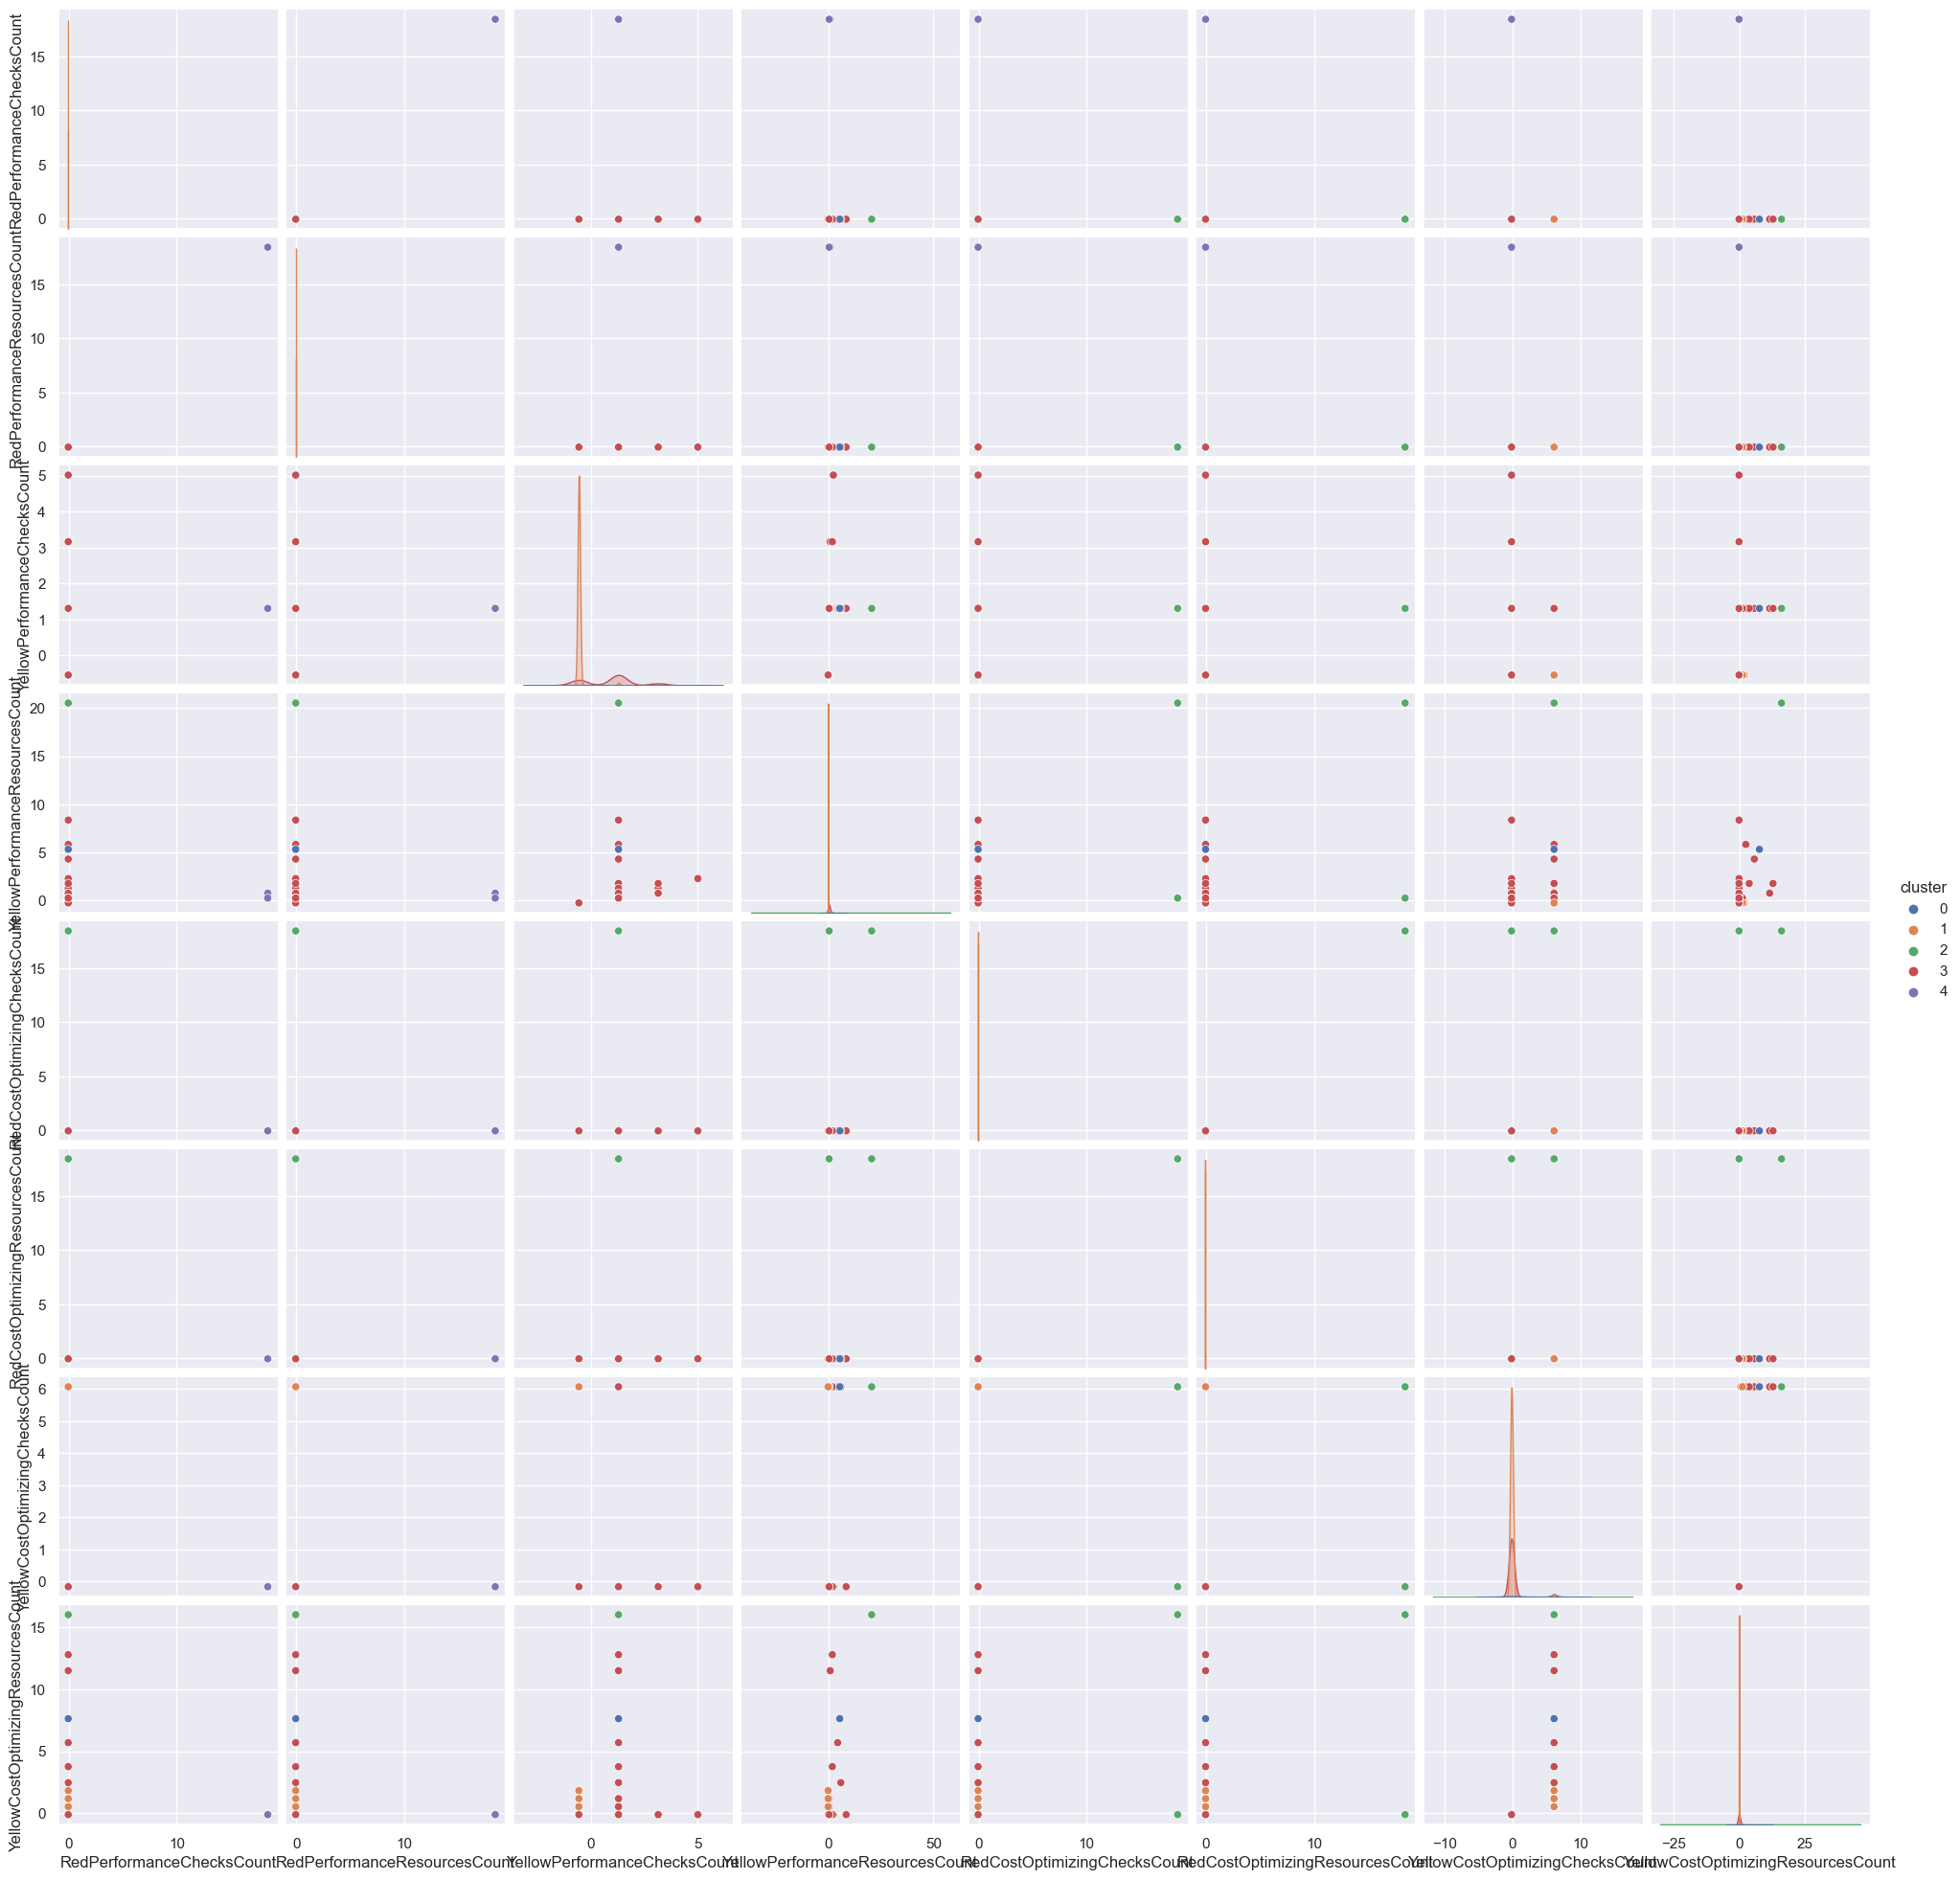

In [ ]:
#scatter_matrix using sns
sns.pairplot(df_checks_scaled[df_checks_scaled.filter(regex='CostOptimizing|Performance|cluster').columns], hue="cluster", palette="deep")
plt.show()


El cluster 2 se ve relevante para los pilares CostOptimizing y Performance. El cluster 1 es de aplicaciones con menos checks (entonces mayor nivel de madurez?), el cluster 3 es con algunos checks, y el cluster 0 se lleva los atípicos o aplicaciones con muchos checks. El cluster 4 se ve relevante para el pilar de Performance.

### Paso 4

In [ ]:
# Paso 4 - Elección del número de clústeres (K)
# Asuminos que sabemos el número de clústeres 4
K = 5

### Paso 5

In [ ]:
# Paso 5 - Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[features])

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


<Axes: xlabel='RedSecurityChecksCount', ylabel='RedSecurityResourcesCount'>

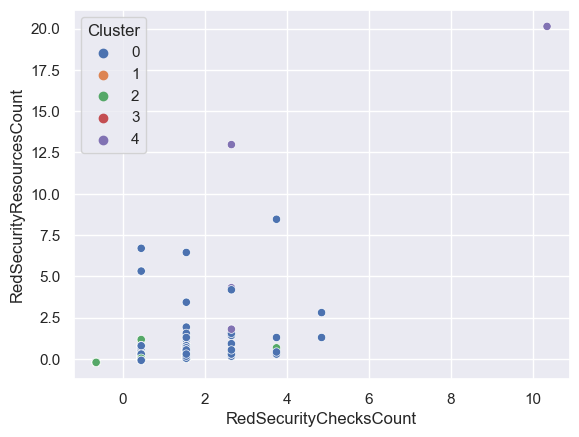

In [ ]:
# Paso 6 - Visualización de los resultados
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="RedSecurityChecksCount", y="RedSecurityResourcesCount", hue="Cluster", palette="deep")

# Análisis con Densidad

In [65]:
df0 = df.filter(regex='applicationcode|pdnresourcessize|density')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   applicationcode              653 non-null    object 
 1   redsecuritydensity           653 non-null    float64
 2   yellowsecuritydensity        653 non-null    float64
 3   redfaulttolerancedensity     653 non-null    float64
 4   yellowfaulttolerancedensity  653 non-null    float64
 5   redperformancedensity        653 non-null    float64
 6   yellowperformancedensity     653 non-null    float64
 7   redcostoptimizingdensity     653 non-null    float64
 8   yellowcostoptimizingdensity  653 non-null    float64
 9   pdnresourcessize             653 non-null    float64
dtypes: float64(9), object(1)
memory usage: 51.1+ KB


In [66]:
df0

applicationcode  redsecuritydensity  yellowsecuritydensity  \
0          app00035               0.038                  0.077   
1          app00032               0.014                  0.058   
2          app00036               0.000                  0.012   
3          app00031               0.000                  0.026   
4          app00033               0.016                  0.016   
..              ...                 ...                    ...   
648        app00882               0.069                  0.092   
649        app00069               0.000                  0.032   
650        app00068               0.000                  0.167   
651        app00066               0.000                  0.013   
652        app00067               0.014                  0.014   

     redfaulttolerancedensity  yellowfaulttolerancedensity  \
0                       0.000                        0.000   
1                       0.000                        0.029   
2                       0.000                        0.002   
3                       0.000                        0.051   
4                       0.000                        0.000   
..                        ...                          ...   
648                     0.023                        0.011   
649                     0.000                        0.016   
650                     0.000                        0.100   
651                     0.000                        0.000   
652                     0.000                        0.000   

     redperformancedensity  yellowperformancedensity  \
0                      0.0                     0.000   
1                      0.0                     0.000   
2                      0.0                     0.000   
3                      0.0                     0.000   
4                      0.0                     0.000   
..                     ...                       ...   
648                    0.0                     0.000   
649                    0.0                     0.000   
650                    0.0                     0.033   
651                    0.0                     0.000   
652                    0.0                     0.000   

     redcostoptimizingdensity  yellowcostoptimizingdensity  pdnresourcessize  
0                         0.0                          0.0             1.415  
1                         0.0                          0.0             1.839  
2                         0.0                          0.0             2.814  
3                         0.0                          0.0             1.591  
4                         0.0                          0.0             1.806  
..                        ...                          ...               ...  
648                       0.0                          0.0             1.940  
649                       0.0                          0.0             1.799  
650                       0.0                          0.0             1.477  
651                       0.0                          0.0             1.875  
652                       0.0                          0.0             1.845  

[653 rows x 10 columns]

In [67]:
df[df['pdnresourcessize']!=0]   

applicationcode  redsecuritydensity  yellowsecuritydensity  \
0          app00035               0.038                  0.077   
1          app00032               0.014                  0.058   
2          app00036               0.000                  0.012   
3          app00031               0.000                  0.026   
4          app00033               0.016                  0.016   
..              ...                 ...                    ...   
648        app00882               0.069                  0.092   
649        app00069               0.000                  0.032   
650        app00068               0.000                  0.167   
651        app00066               0.000                  0.013   
652        app00067               0.014                  0.014   

     redfaulttolerancedensity  yellowfaulttolerancedensity  \
0                       0.000                        0.000   
1                       0.000                        0.029   
2                       0.000                        0.002   
3                       0.000                        0.051   
4                       0.000                        0.000   
..                        ...                          ...   
648                     0.023                        0.011   
649                     0.000                        0.016   
650                     0.000                        0.100   
651                     0.000                        0.000   
652                     0.000                        0.000   

     redperformancedensity  yellowperformancedensity  \
0                      0.0                     0.000   
1                      0.0                     0.000   
2                      0.0                     0.000   
3                      0.0                     0.000   
4                      0.0                     0.000   
..                     ...                       ...   
648                    0.0                     0.000   
649                    0.0                     0.000   
650                    0.0                     0.033   
651                    0.0                     0.000   
652                    0.0                     0.000   

     redcostoptimizingdensity  yellowcostoptimizingdensity  pdnresourcessize  
0                         0.0                          0.0             1.415  
1                         0.0                          0.0             1.839  
2                         0.0                          0.0             2.814  
3                         0.0                          0.0             1.591  
4                         0.0                          0.0             1.806  
..                        ...                          ...               ...  
648                       0.0                          0.0             1.940  
649                       0.0                          0.0             1.799  
650                       0.0                          0.0             1.477  
651                       0.0                          0.0             1.875  
652                       0.0                          0.0             1.845  

[653 rows x 10 columns]

In [68]:
df0 = df0[df0['pdnresourcessize'] != 0]
df0 = df0.dropna()
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   applicationcode              653 non-null    object 
 1   redsecuritydensity           653 non-null    float64
 2   yellowsecuritydensity        653 non-null    float64
 3   redfaulttolerancedensity     653 non-null    float64
 4   yellowfaulttolerancedensity  653 non-null    float64
 5   redperformancedensity        653 non-null    float64
 6   yellowperformancedensity     653 non-null    float64
 7   redcostoptimizingdensity     653 non-null    float64
 8   yellowcostoptimizingdensity  653 non-null    float64
 9   pdnresourcessize             653 non-null    float64
dtypes: float64(9), object(1)
memory usage: 56.1+ KB


<Axes: >

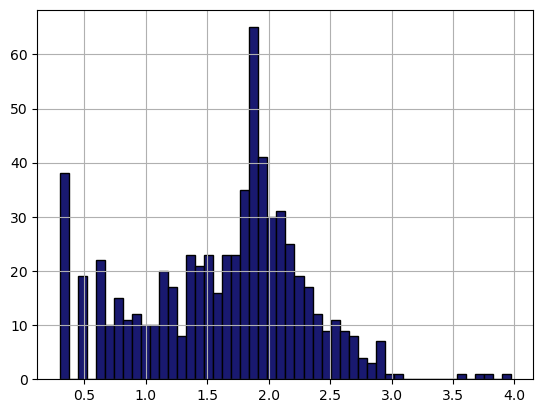

In [69]:
df0['pdnresourcessize'].hist(bins=50, facecolor='midnightblue', edgecolor='black')

Al realizar el logaritmo a la variable pdnresourcessize se encuentra una mejor distribución, y esto permite que el modelo pueda tener información sobre la carga de trabajo que esta siendo analizada.


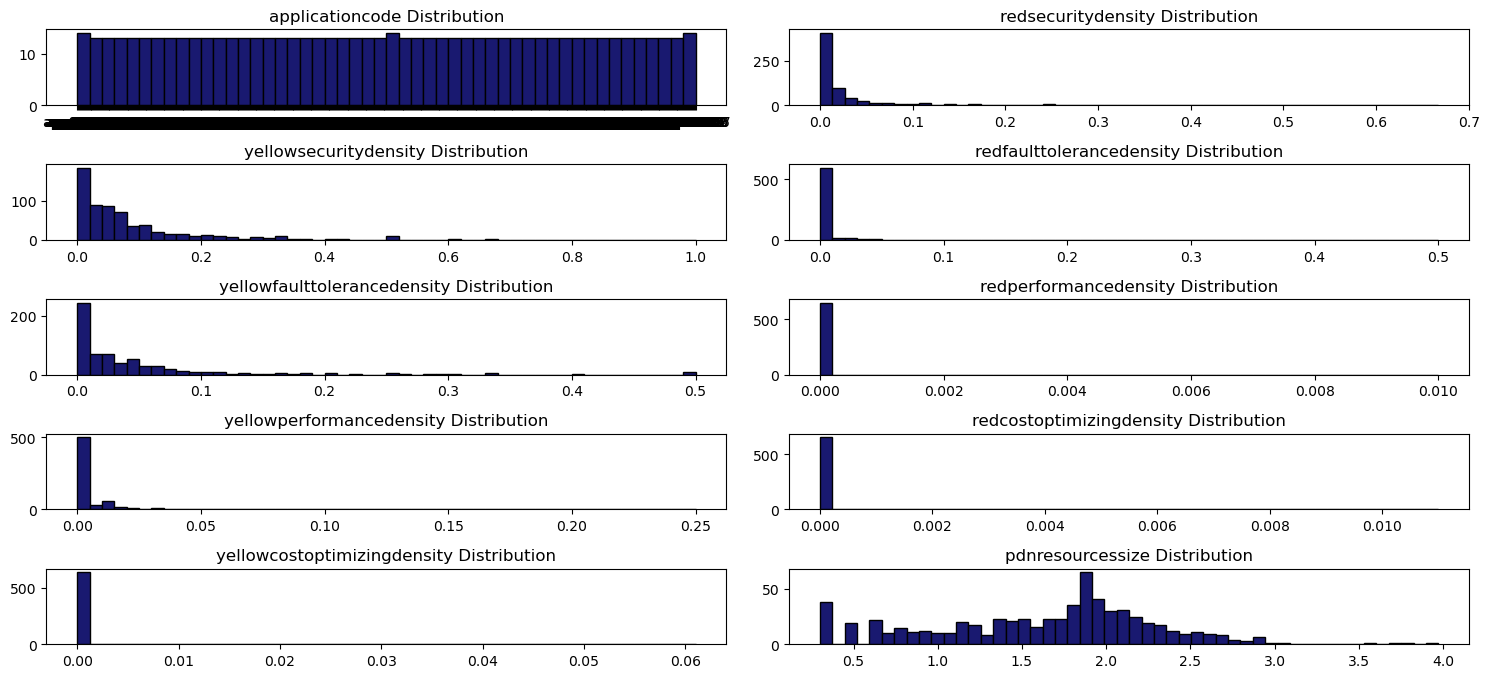

In [70]:
draw_histograms(df, df.columns, 6, 2)

In [71]:
features = df0.columns.to_list()
features.remove('applicationcode')

In [72]:
features

['redsecuritydensity',
 'yellowsecuritydensity',
 'redfaulttolerancedensity',
 'yellowfaulttolerancedensity',
 'redperformancedensity',
 'yellowperformancedensity',
 'redcostoptimizingdensity',
 'yellowcostoptimizingdensity',
 'pdnresourcessize']

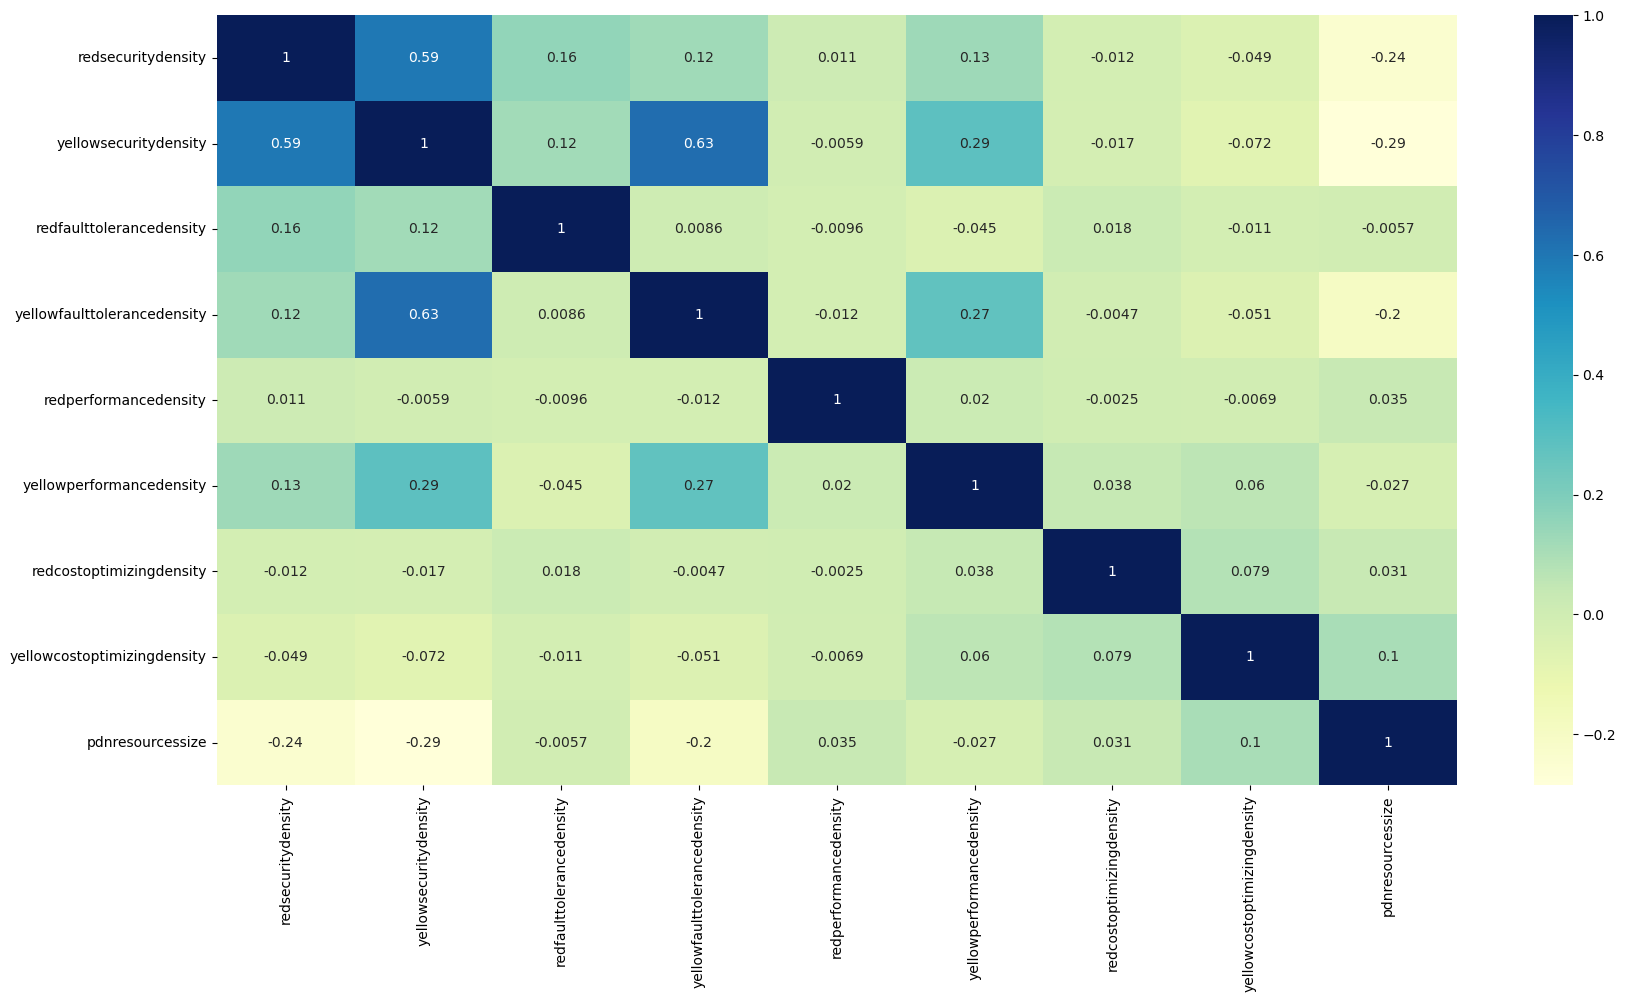

In [74]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df0[features].corr(), annot=True, cmap="YlGnBu")
plt.show()

Se encuentra correlacion entre la densidad de los checks amarillos y rojos en el pilar de seguridad (yellowsecuritydensity y redsecuritydensity), también en otras variables como la densidad de checks amarillos del pilar de tolerancia de fallos con la densidad de checks rojos en el pilar seguridad (yellowfaulttolerancedensity y redsecuritydensity). En general las correlaciones no son tan grandes como para indicar redundancia en las dimensiones. La variable pdnresourcessize no tiene mucha correlación con el resto de variables. Esto es bueno porque significa que puede aportar información al modelo.

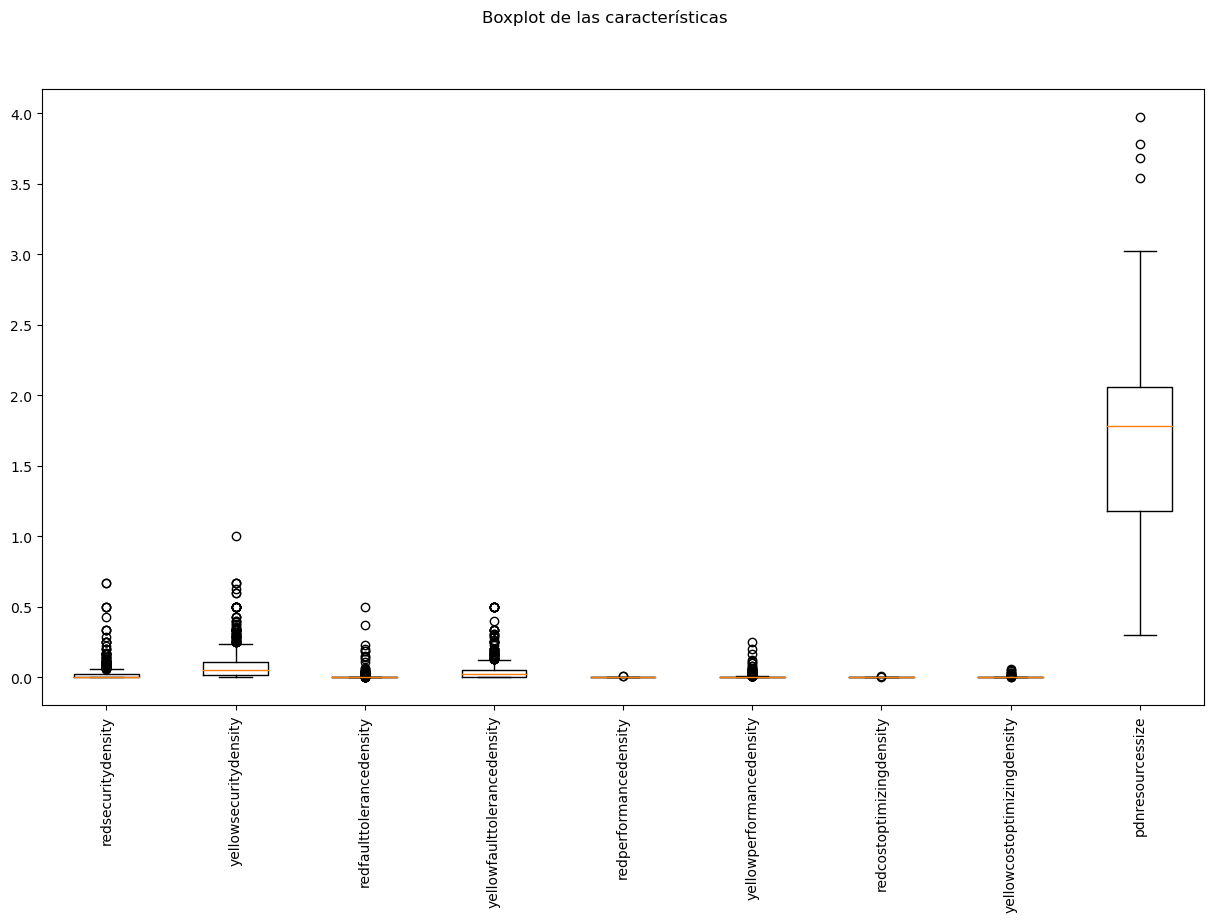

In [76]:
# boxplot for df0
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Boxplot de las características')
ax = fig.add_subplot(111)
plt.boxplot(df0[features])
ax.set_xticklabels(df0[features].columns, rotation=90)
plt.show()

In [77]:
df0.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          653.000000             653.000000                653.000000   
mean             0.027322               0.090749                  0.005496   
std              0.068309               0.120340                  0.031505   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.015000                  0.000000   
50%              0.000000               0.053000                  0.000000   
75%              0.023000               0.108000                  0.000000   
max              0.667000               1.000000                  0.500000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   653.000000             653.000000   
mean                      0.045643               0.000028   
std                       0.078281               0.000501   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       0.021000               0.000000   
75%                       0.051000               0.000000   
max                       0.500000               0.010000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                653.000000                653.000000   
mean                   0.005798                  0.000020   
std                    0.019052                  0.000437   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.003000                  0.000000   
max                    0.250000                  0.011000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   653.000000        653.000000  
mean                      0.000544          1.622894  
std                       0.004374          0.669225  
min                       0.000000          0.301000  
25%                       0.000000          1.176000  
50%                       0.000000          1.785000  
75%                       0.000000          2.057000  
max                       0.061000          3.972000

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


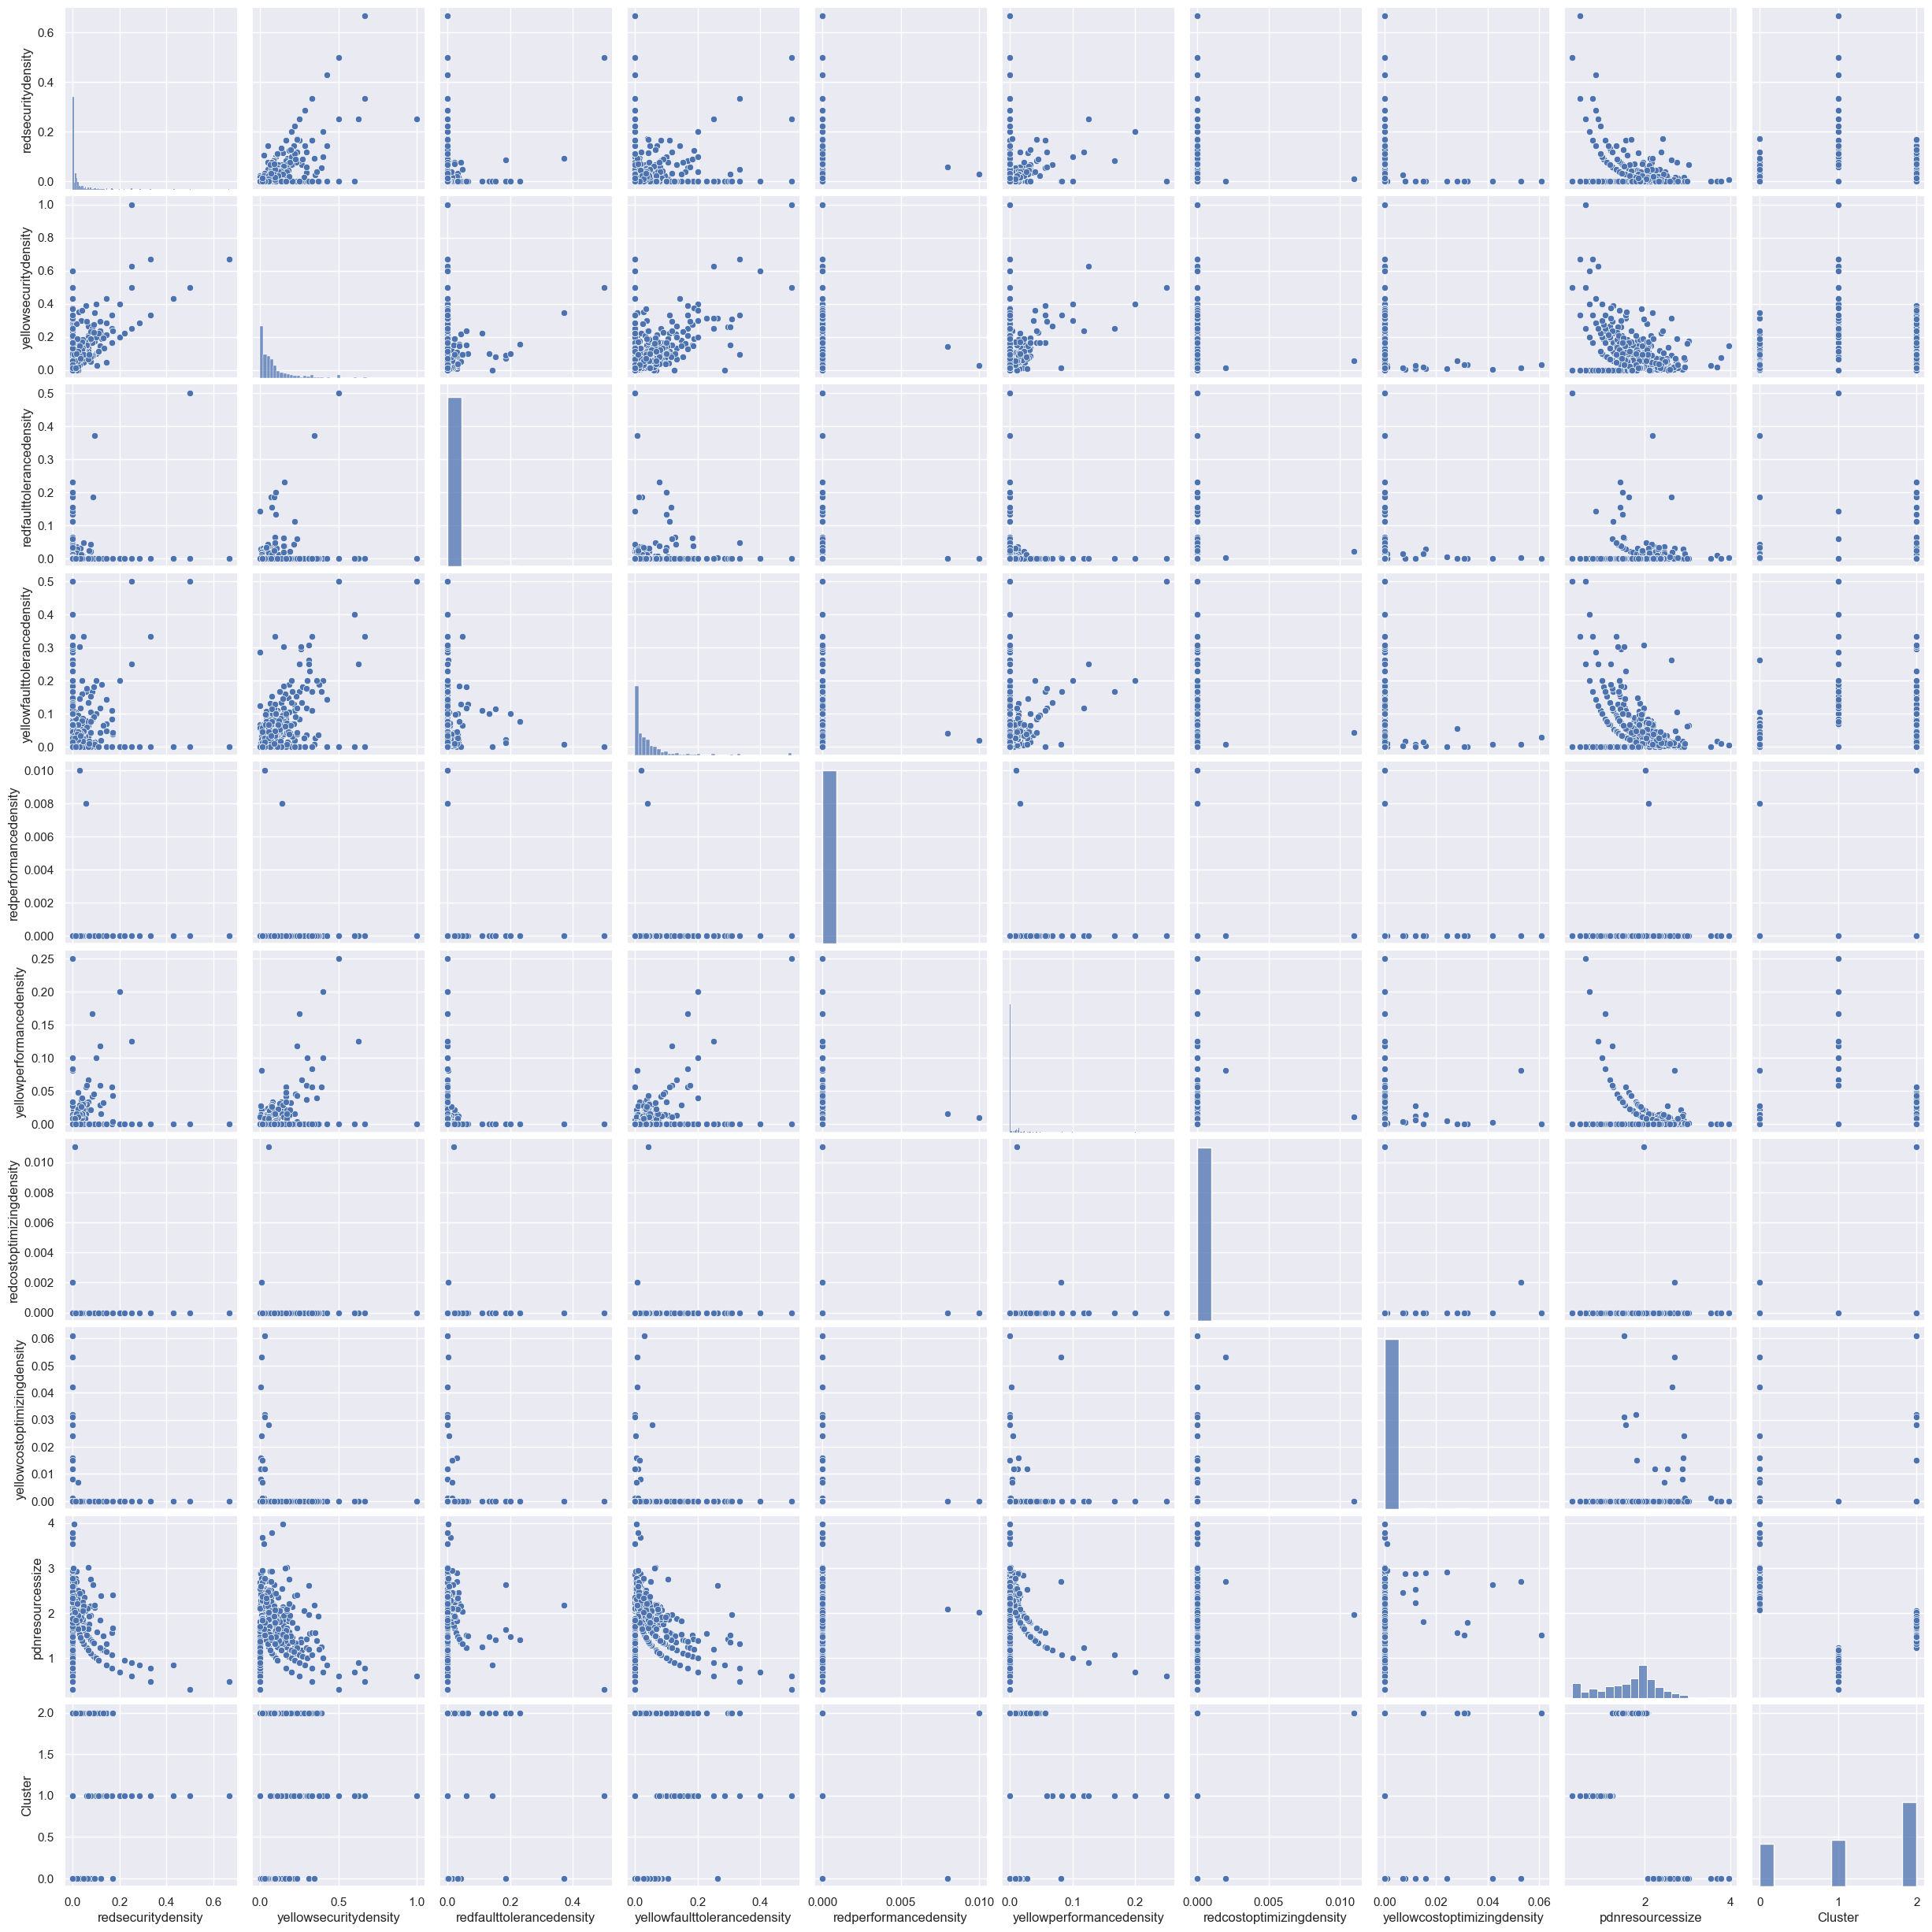

In [108]:
sns.pairplot(df0)

In [158]:
# remove rows with values = 0
df0 = df0.drop('Cluster', axis=1)


In [159]:
df0.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          554.000000             554.000000                554.000000   
mean             0.032204               0.106966                  0.006478   
std              0.073102               0.123841                  0.034115   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.032000                  0.000000   
50%              0.011000               0.066000                  0.000000   
75%              0.029000               0.129750                  0.000000   
max              0.667000               1.000000                  0.500000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   554.000000             554.000000   
mean                      0.053800               0.000032   
std                       0.082373               0.000544   
min                       0.000000               0.000000   
25%                       0.008250               0.000000   
50%                       0.028000               0.000000   
75%                       0.063000               0.000000   
max                       0.500000               0.010000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                554.000000                554.000000   
mean                   0.006834                  0.000023   
std                    0.020515                  0.000475   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.007000                  0.000000   
max                    0.250000                  0.011000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   554.000000        554.000000  
mean                      0.000641          1.786236  
std                       0.004743          0.564769  
min                       0.000000          0.301000  
25%                       0.000000          1.462000  
50%                       0.000000          1.863000  
75%                       0.000000          2.114500  
max                       0.061000          3.972000

Vamos a remover los checks iguales a cero en todas las aplicaciones. Son aplicaciones en excelente estado de salud que no son objeto de análisis para la solución.

In [133]:
df0 = df0.iloc[~(df0[features]==0).all(axis=1).values,:]

La normalización mejora notablemente la clusterización, se aplica para la variable pdnrsourcessize

In [161]:
features = df0.columns.to_list()
features.remove('applicationcode')
features

['redsecuritydensity',
 'yellowsecuritydensity',
 'redfaulttolerancedensity',
 'yellowfaulttolerancedensity',
 'redperformancedensity',
 'yellowperformancedensity',
 'redcostoptimizingdensity',
 'yellowcostoptimizingdensity',
 'pdnresourcessize']

In [162]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df0_scaled = scaler.fit_transform(df0[features])
df0_scaled = pd.DataFrame(df0_scaled, columns=df0[features].columns, index=df0.index)
df0_scaled = pd.concat([df0['applicationcode'], df0_scaled], axis=1)


In [163]:
df0_scaled.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          554.000000             554.000000                554.000000   
mean             0.048282               0.106966                  0.012957   
std              0.109598               0.123841                  0.068231   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.032000                  0.000000   
50%              0.016492               0.066000                  0.000000   
75%              0.043478               0.129750                  0.000000   
max              1.000000               1.000000                  1.000000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   554.000000             554.000000   
mean                      0.107599               0.003249   
std                       0.164746               0.054361   
min                       0.000000               0.000000   
25%                       0.016500               0.000000   
50%                       0.056000               0.000000   
75%                       0.126000               0.000000   
max                       1.000000               1.000000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                554.000000                554.000000   
mean                   0.027336                  0.002133   
std                    0.082059                  0.043169   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.028000                  0.000000   
max                    1.000000                  1.000000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   554.000000        554.000000  
mean                      0.010505          0.404586  
std                       0.077752          0.153846  
min                       0.000000          0.000000  
25%                       0.000000          0.316263  
50%                       0.000000          0.425497  
75%                       0.000000          0.494007  
max                       1.000000          1.000000

Probando Kmeans, con 3 clusters


In [164]:
# run kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df0_scaled['Cluster'] = kmeans.fit_predict(df0_scaled.drop(columns=['applicationcode']))


c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [165]:
df0_scaled['Cluster'].value_counts()

1    392
0    126
2     36
Name: Cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


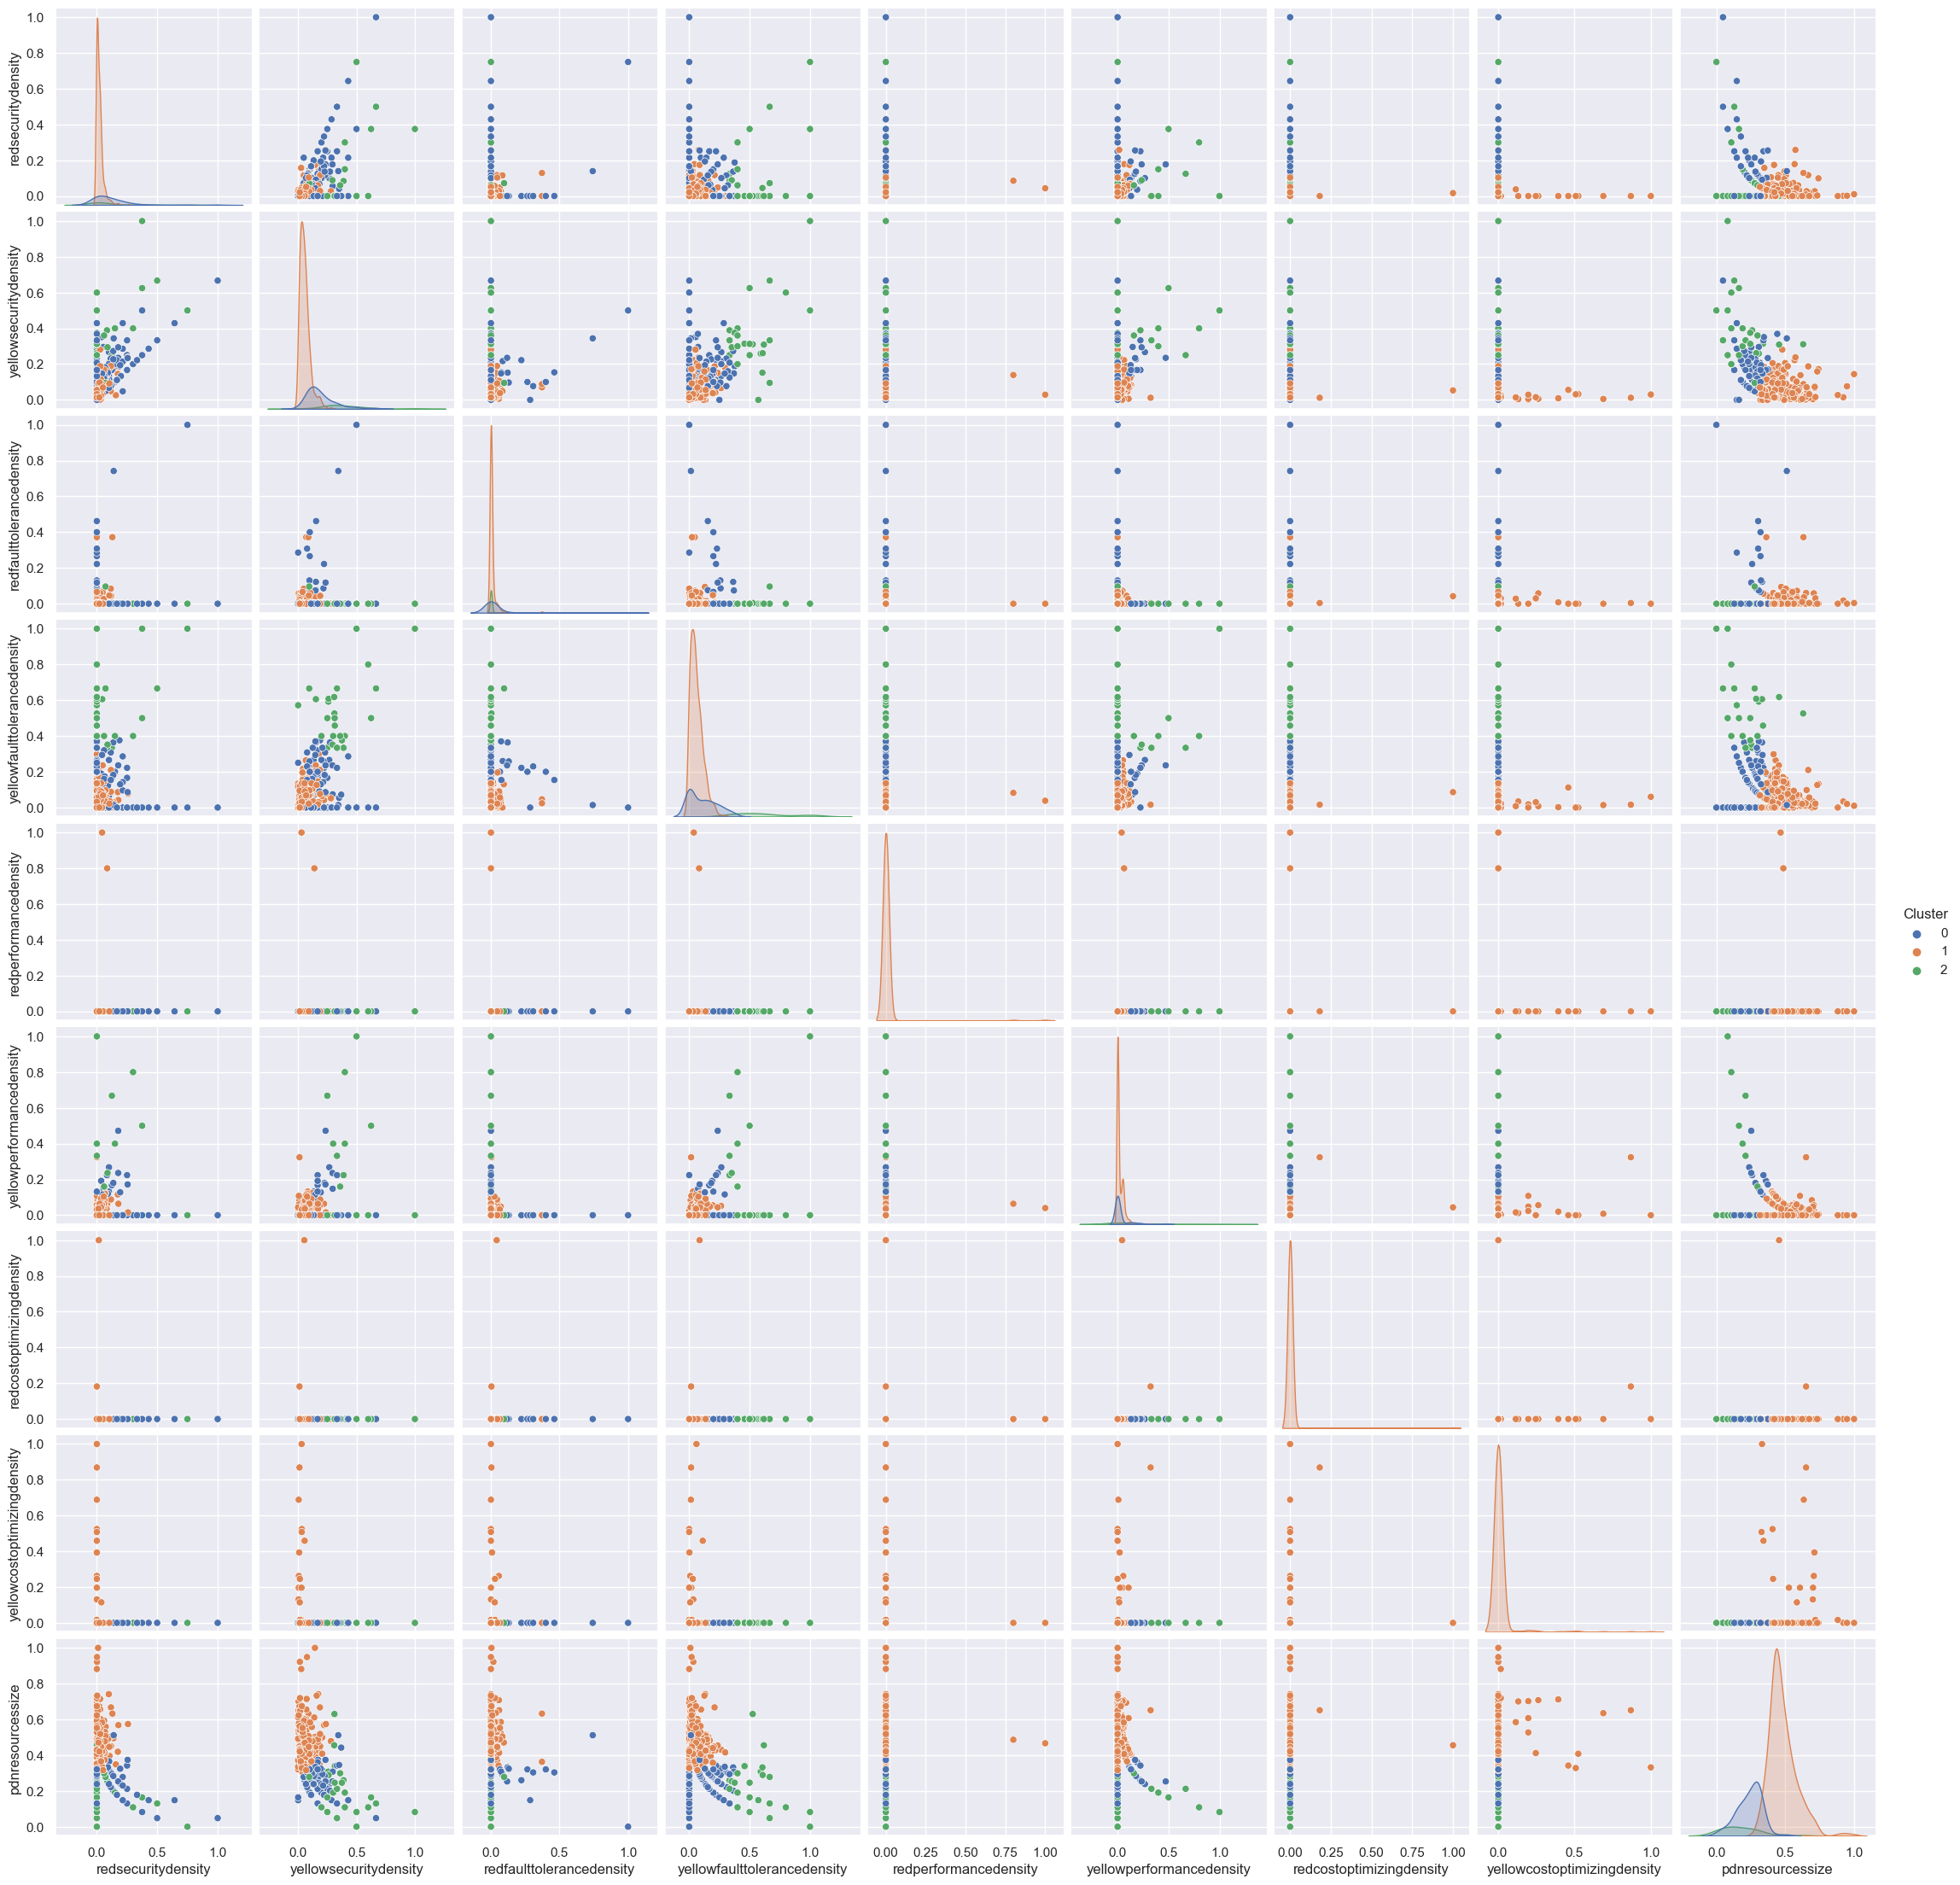

In [166]:
# Gráfica de dispersión
sns.pairplot(df0_scaled, hue="Cluster", palette="deep")
plt.show()

<Axes: xlabel='yellowfaulttolerancedensity', ylabel='yellowsecuritydensity'>

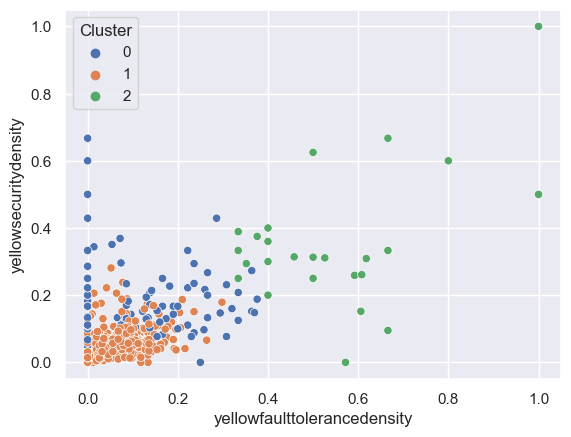

In [167]:
# Gráfica de dispersión
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df0_scaled, x="yellowfaulttolerancedensity", y="yellowsecuritydensity", hue="Cluster", palette="deep")


### K = 5 clusters
K=5, normalización de la variable pdnresourcessize, sin apps con 0 checks en todos los pilares.

In [168]:
df0_scaled = df0_scaled.drop(columns=['Cluster'])
df0_scaled.describe()

redsecuritydensity  yellowsecuritydensity  redfaulttolerancedensity  \
count          554.000000             554.000000                554.000000   
mean             0.048282               0.106966                  0.012957   
std              0.109598               0.123841                  0.068231   
min              0.000000               0.000000                  0.000000   
25%              0.000000               0.032000                  0.000000   
50%              0.016492               0.066000                  0.000000   
75%              0.043478               0.129750                  0.000000   
max              1.000000               1.000000                  1.000000   

       yellowfaulttolerancedensity  redperformancedensity  \
count                   554.000000             554.000000   
mean                      0.107599               0.003249   
std                       0.164746               0.054361   
min                       0.000000               0.000000   
25%                       0.016500               0.000000   
50%                       0.056000               0.000000   
75%                       0.126000               0.000000   
max                       1.000000               1.000000   

       yellowperformancedensity  redcostoptimizingdensity  \
count                554.000000                554.000000   
mean                   0.027336                  0.002133   
std                    0.082059                  0.043169   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.028000                  0.000000   
max                    1.000000                  1.000000   

       yellowcostoptimizingdensity  pdnresourcessize  
count                   554.000000        554.000000  
mean                      0.010505          0.404586  
std                       0.077752          0.153846  
min                       0.000000          0.000000  
25%                       0.000000          0.316263  
50%                       0.000000          0.425497  
75%                       0.000000          0.494007  
max                       1.000000          1.000000

In [169]:
kmeans = KMeans(n_clusters=5, random_state=42)
df0_scaled['Cluster'] = kmeans.fit_predict(df0_scaled.drop(columns=['applicationcode']))

df0_scaled['Cluster'].value_counts()

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


3    359
0    135
4     40
1     11
2      9
Name: Cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


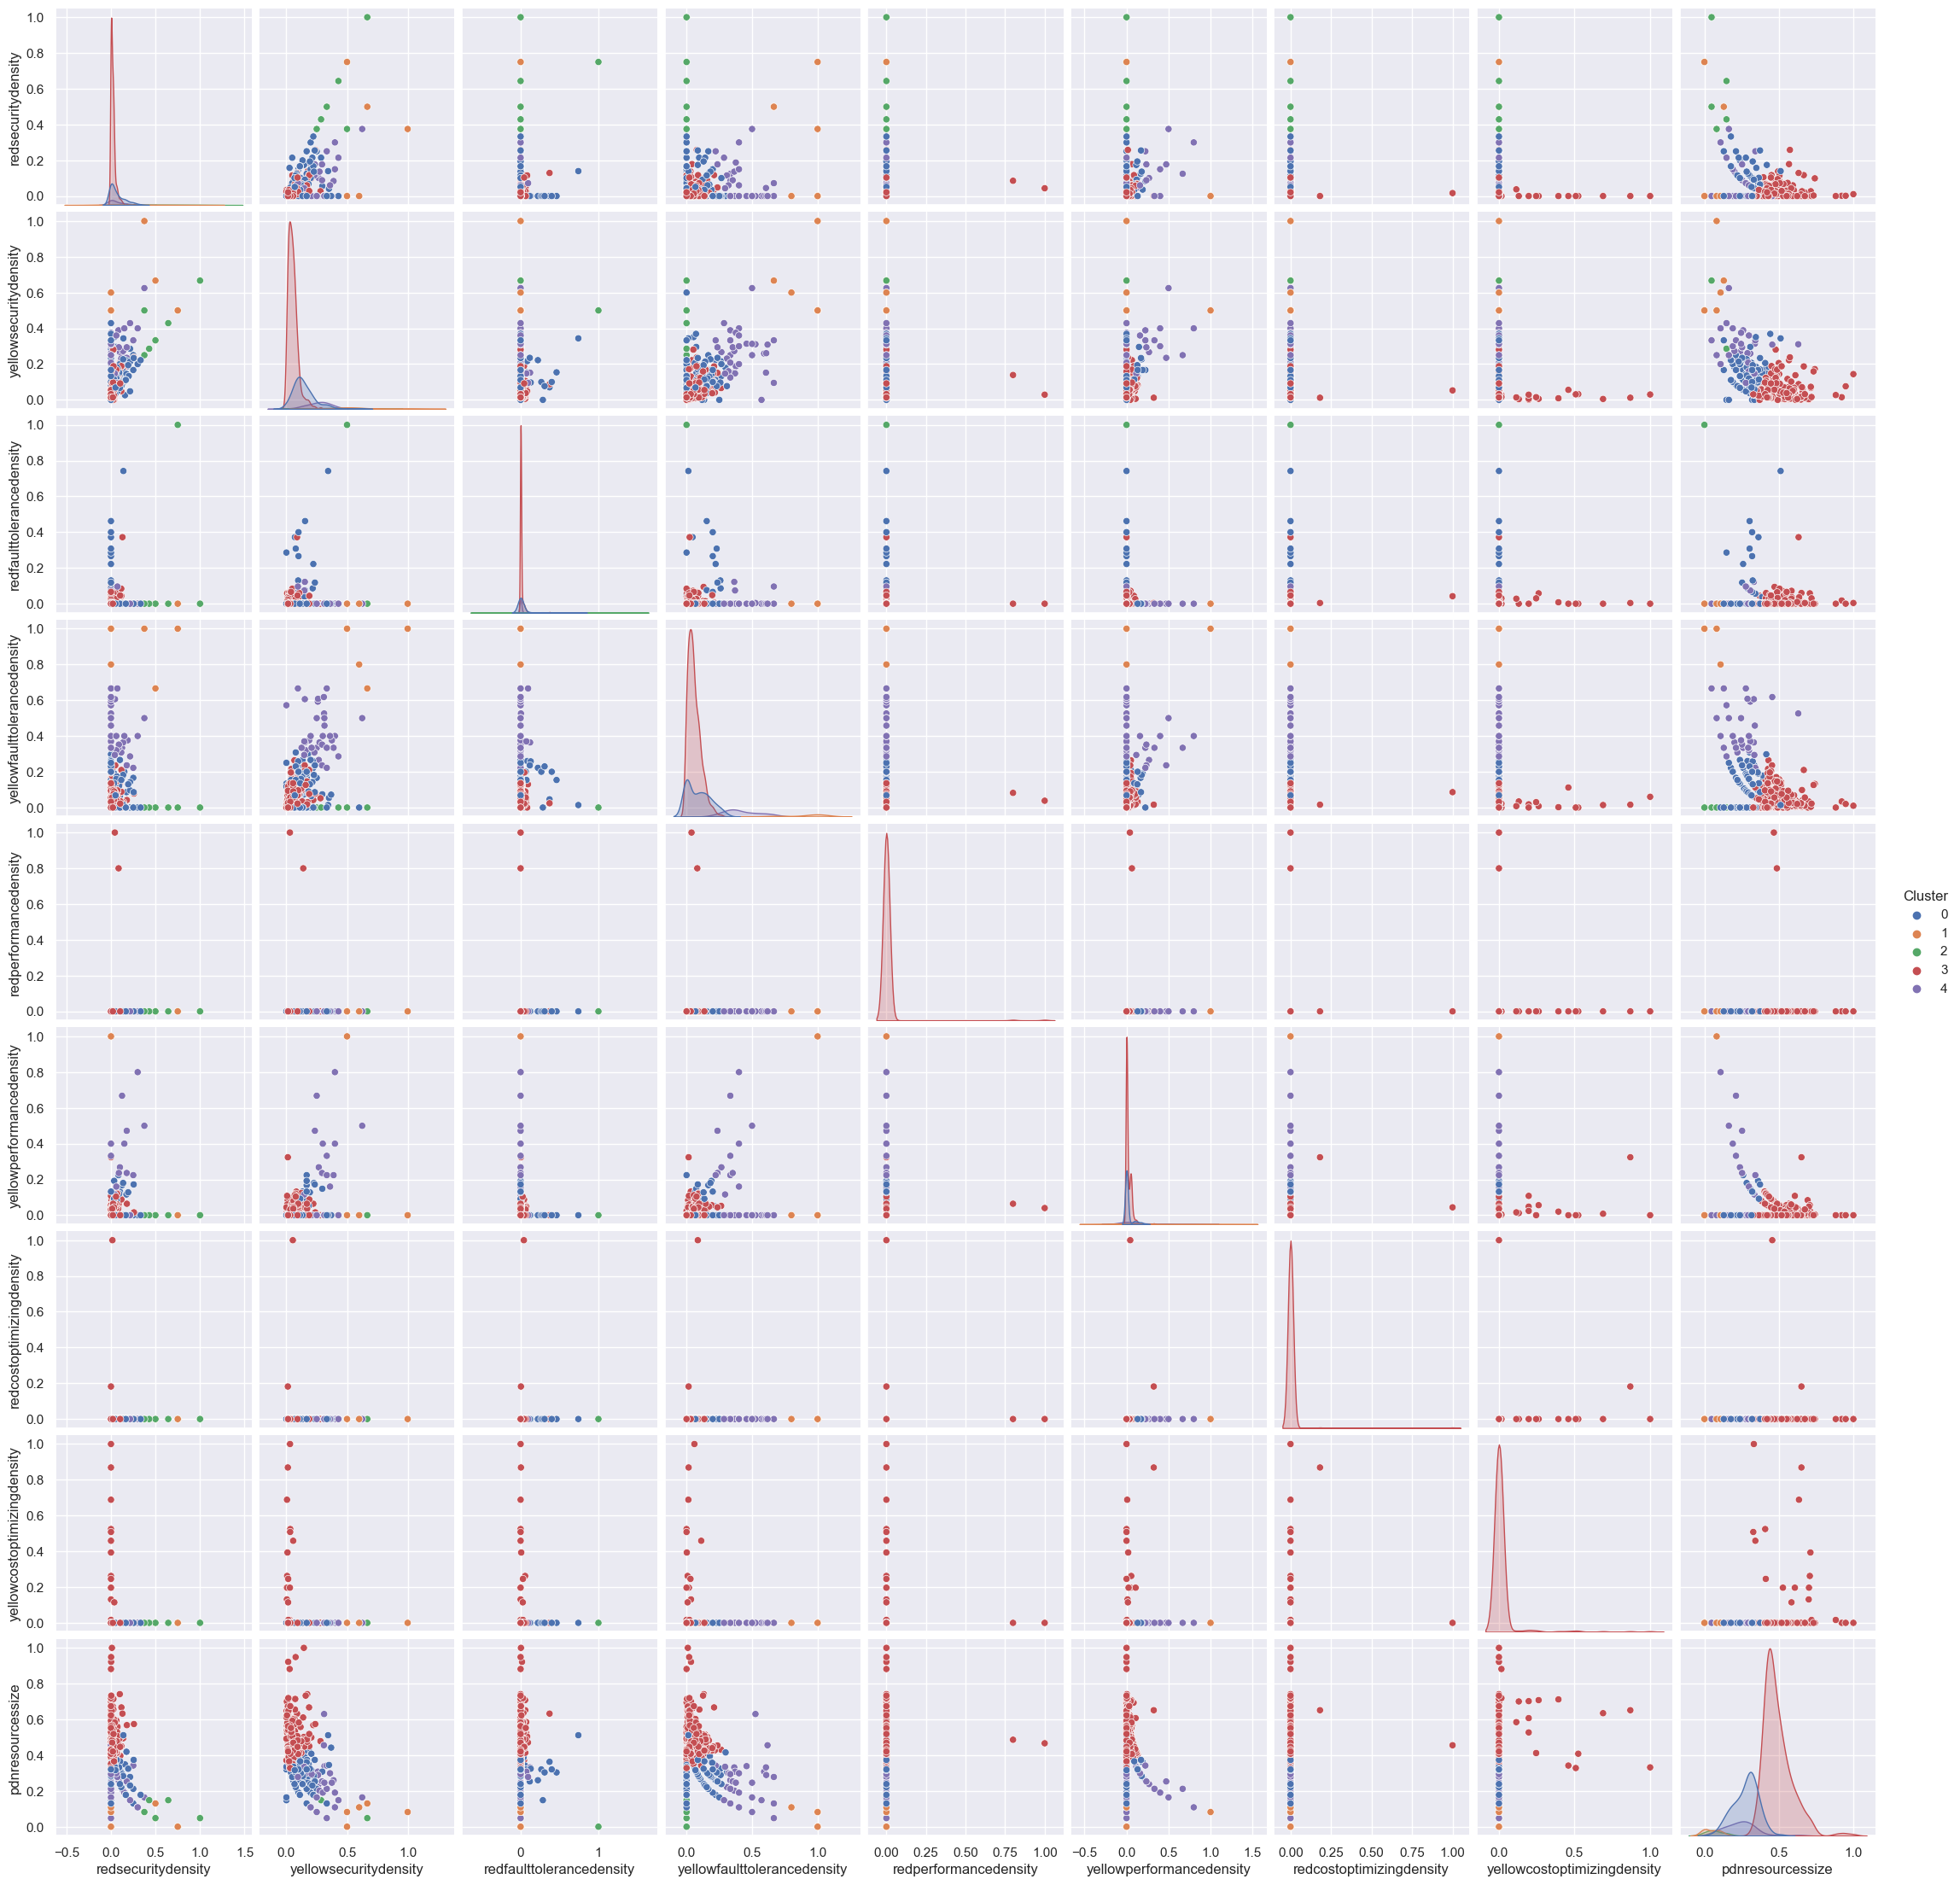

In [170]:
sns.pairplot(df0_scaled, hue="Cluster", palette="deep")

<Axes: xlabel='pdnresourcessize', ylabel='yellowcostoptimizingdensity'>

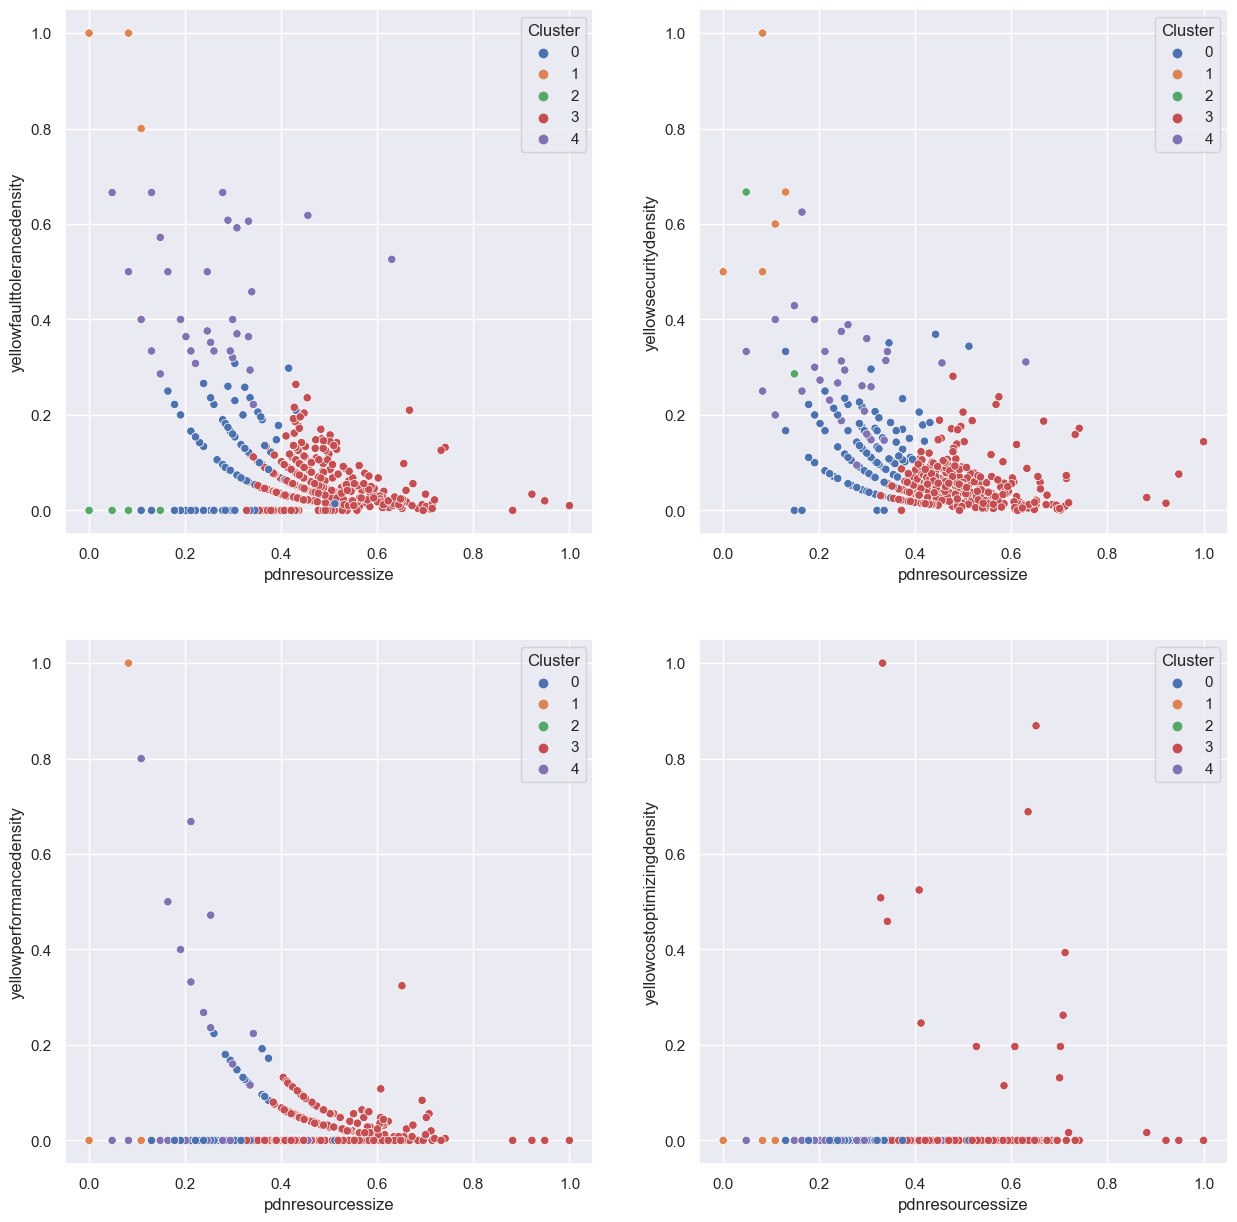

In [177]:
# scatter plot in subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(data=df0_scaled, x="pdnresourcessize", y="yellowfaulttolerancedensity", hue="Cluster", palette="deep", ax=axs[0, 0])
sns.scatterplot(data=df0_scaled, x="pdnresourcessize", y="yellowsecuritydensity", hue="Cluster", palette="deep", ax=axs[0, 1])
sns.scatterplot(data=df0_scaled, x="pdnresourcessize", y="yellowperformancedensity", hue="Cluster", palette="deep", ax=axs[1, 0])
sns.scatterplot(data=df0_scaled, x="pdnresourcessize", y="yellowcostoptimizingdensity", hue="Cluster", palette="deep", ax=axs[1, 1])


En general hay unos grupos interesantes. El grupo rojo puede describirse como uno de aplicaciones con gran tamaño, y densidad de checks de costoptimizing. El grupo naranja por otro lado muestra en general aplicaciones con alta densidad en el resto de pilares. 

### Solo pilar Security
Los ceros en la densidad pueden generar mucho ruido, nuevamente se va a hacer un filtro para dejar unicamente las aplicaciones con checks de seguridad.

In [84]:
df_sec = df.filter(regex='applicationcode|pdnresourcessize|security')
df_sec.info()


(653, 4)


In [87]:
df_sec = df_sec[df_sec['yellowsecuritydensity'] != 0]
df_sec = df_sec[df_sec['redsecuritydensity'] != 0]
df_sec.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 652
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   applicationcode        322 non-null    object 
 1   redsecuritydensity     322 non-null    float64
 2   yellowsecuritydensity  322 non-null    float64
 3   pdnresourcessize       322 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


Quedan solo 322 entradas, y 4 variables, vamos a ver como responde en este caso

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


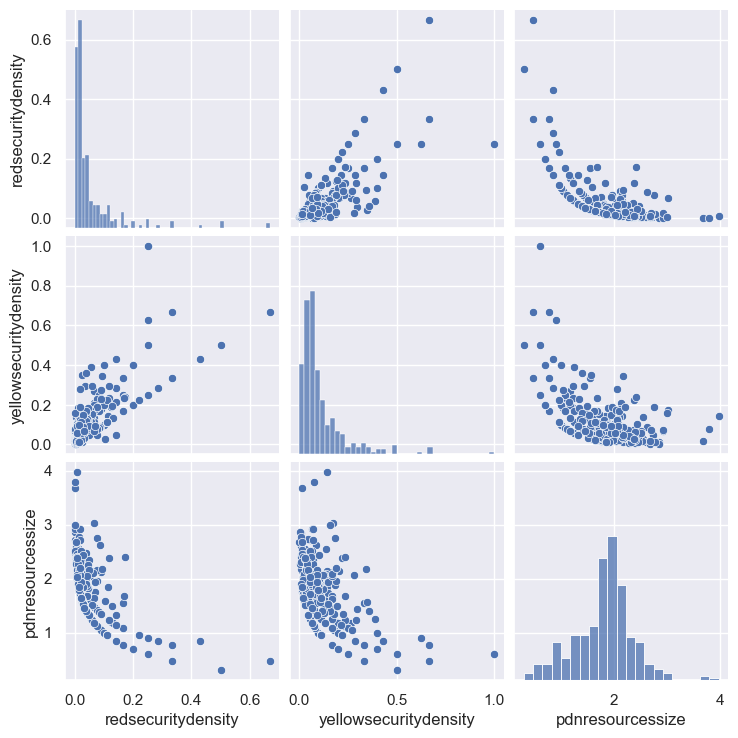

In [91]:
# pairplot
sns.pairplot(df_sec)

Las aplicaciones con densidad de checks amarillos más baja son las que más recursos desplegados tienen. Hay una menor densidad entre más recursos tiene una aplicación, una aplicación con poquitos recursos, en generar tienen baja densidad de checks en amarillo y rojo. Ahora, las aplicación con pocos recursos, y alta densidad de checks, son aplicaciones susceptibles a ser revisadas detenidamente dado que pueden estar generando brechas de seguridad grandes para la organización.

In [92]:
# k means de df_sec
kmeans = KMeans(n_clusters=3, random_state=42)
df_sec['Cluster'] = kmeans.fit_predict(df_sec.drop(columns=['applicationcode']))

df_sec['Cluster'].value_counts()

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


2    193
0     75
1     54
Name: Cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


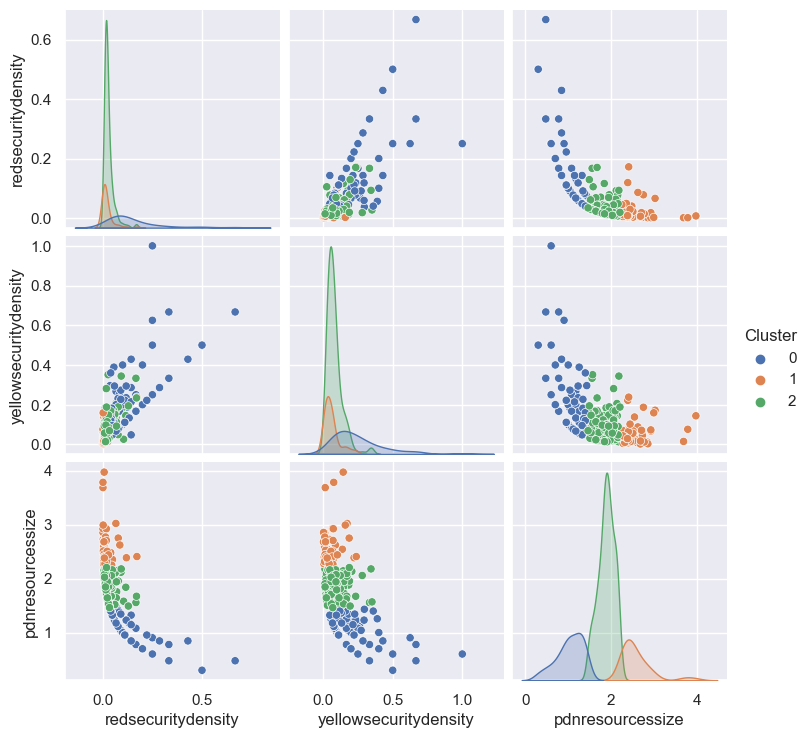

In [101]:
# Gráfica de dispersión
sns.pairplot(df_sec, hue="Cluster", palette="deep")
plt.show()

En el grupo azul se ven las aplicaciones con alta densidad de checks amarillos y rojos y poca cantidad de recursos. Este sería un grupo crítico de aplicaciones que deben ser intervenidas. El grupo verde son aplicaciones con pocos checks y un tamaño de aplicación mediano, por último el grupo naranja son aplicaciones con pocos checks y un tamaño de aplicación grande.

In [102]:
# normalize pdnresourcessize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sec_scaled = scaler.fit_transform(df_sec.drop(columns=['applicationcode']))

# index to keep the index of df_sec
df_sec_scaled = pd.DataFrame(df_sec_scaled, columns=df_sec.drop(columns=['applicationcode']).columns, index=df_sec.index)

#concat df_sec_scaled with applicationcode
df_sec_scaled = pd.concat([df_sec['applicationcode'], df_sec_scaled], axis=1)

df_sec_scaled.describe()


redsecuritydensity  yellowsecuritydensity  pdnresourcessize     Cluster
count          322.000000             322.000000        322.000000  322.000000
mean             0.081515               0.112240          0.408314    0.683230
std              0.133688               0.123429          0.151186    0.418384
min              0.000000               0.000000          0.000000    0.000000
25%              0.019520               0.043086          0.325116    0.500000
50%              0.033033               0.071643          0.425497    1.000000
75%              0.082583               0.135020          0.488968    1.000000
max              1.000000               1.000000          1.000000    1.000000

In [104]:
# remove column Cluster
df_sec_scaled = df_sec_scaled.drop(columns=['Cluster'])
df_sec_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 652
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   applicationcode        322 non-null    object 
 1   redsecuritydensity     322 non-null    float64
 2   yellowsecuritydensity  322 non-null    float64
 3   pdnresourcessize       322 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.6+ KB


In [106]:
kmeans = KMeans(n_clusters=3, random_state=42)

df_sec_scaled['Cluster'] = kmeans.fit_predict(df_sec_scaled[df_sec_scaled.columns.to_list()[1:]])

df_sec_scaled['Cluster'].value_counts()

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1    236
0     74
2     12
Name: Cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


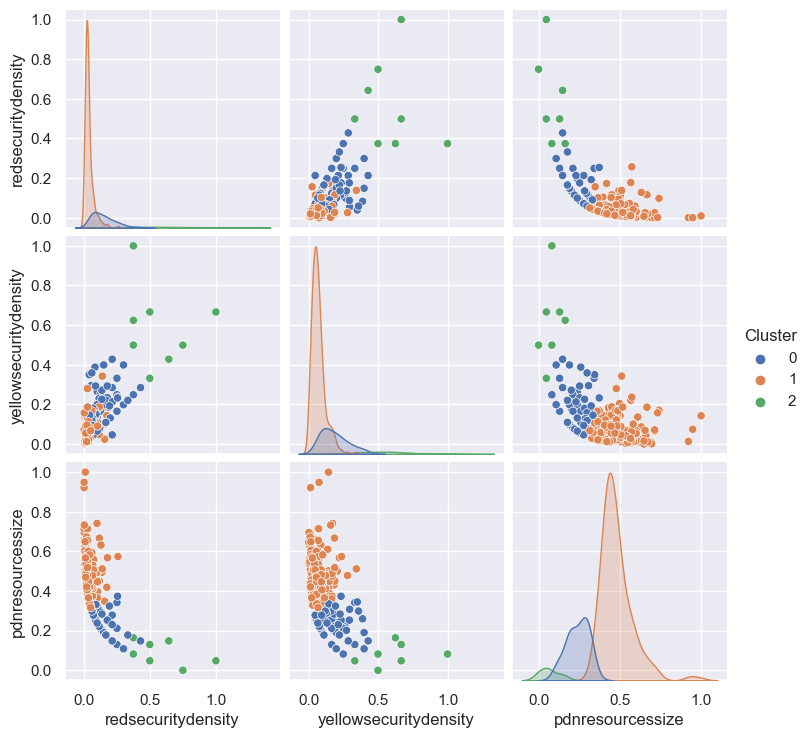

In [107]:
# pairplot
sns.pairplot(df_sec_scaled, hue="Cluster", palette="deep")
plt.show()

Con la normalización se encuentran mejores resultados, porque logra distinguir las aplicaciones con altas densidades de checks, incluso separa el grupo de los que tienen baja densidad (matriz entre yellowsecuritydensity y redsecuritydensity).

### DBSCAN

In [192]:
df0_scaled = df0_scaled.drop(columns=['Cluster'])

In [205]:
# apply dbscan
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=11).fit(df0_scaled.drop(columns=['applicationcode']))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df0_scaled['Cluster'] = labels

In [206]:
df0_scaled['Cluster'].value_counts()

 0    501
-1     53
Name: Cluster, dtype: int64

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


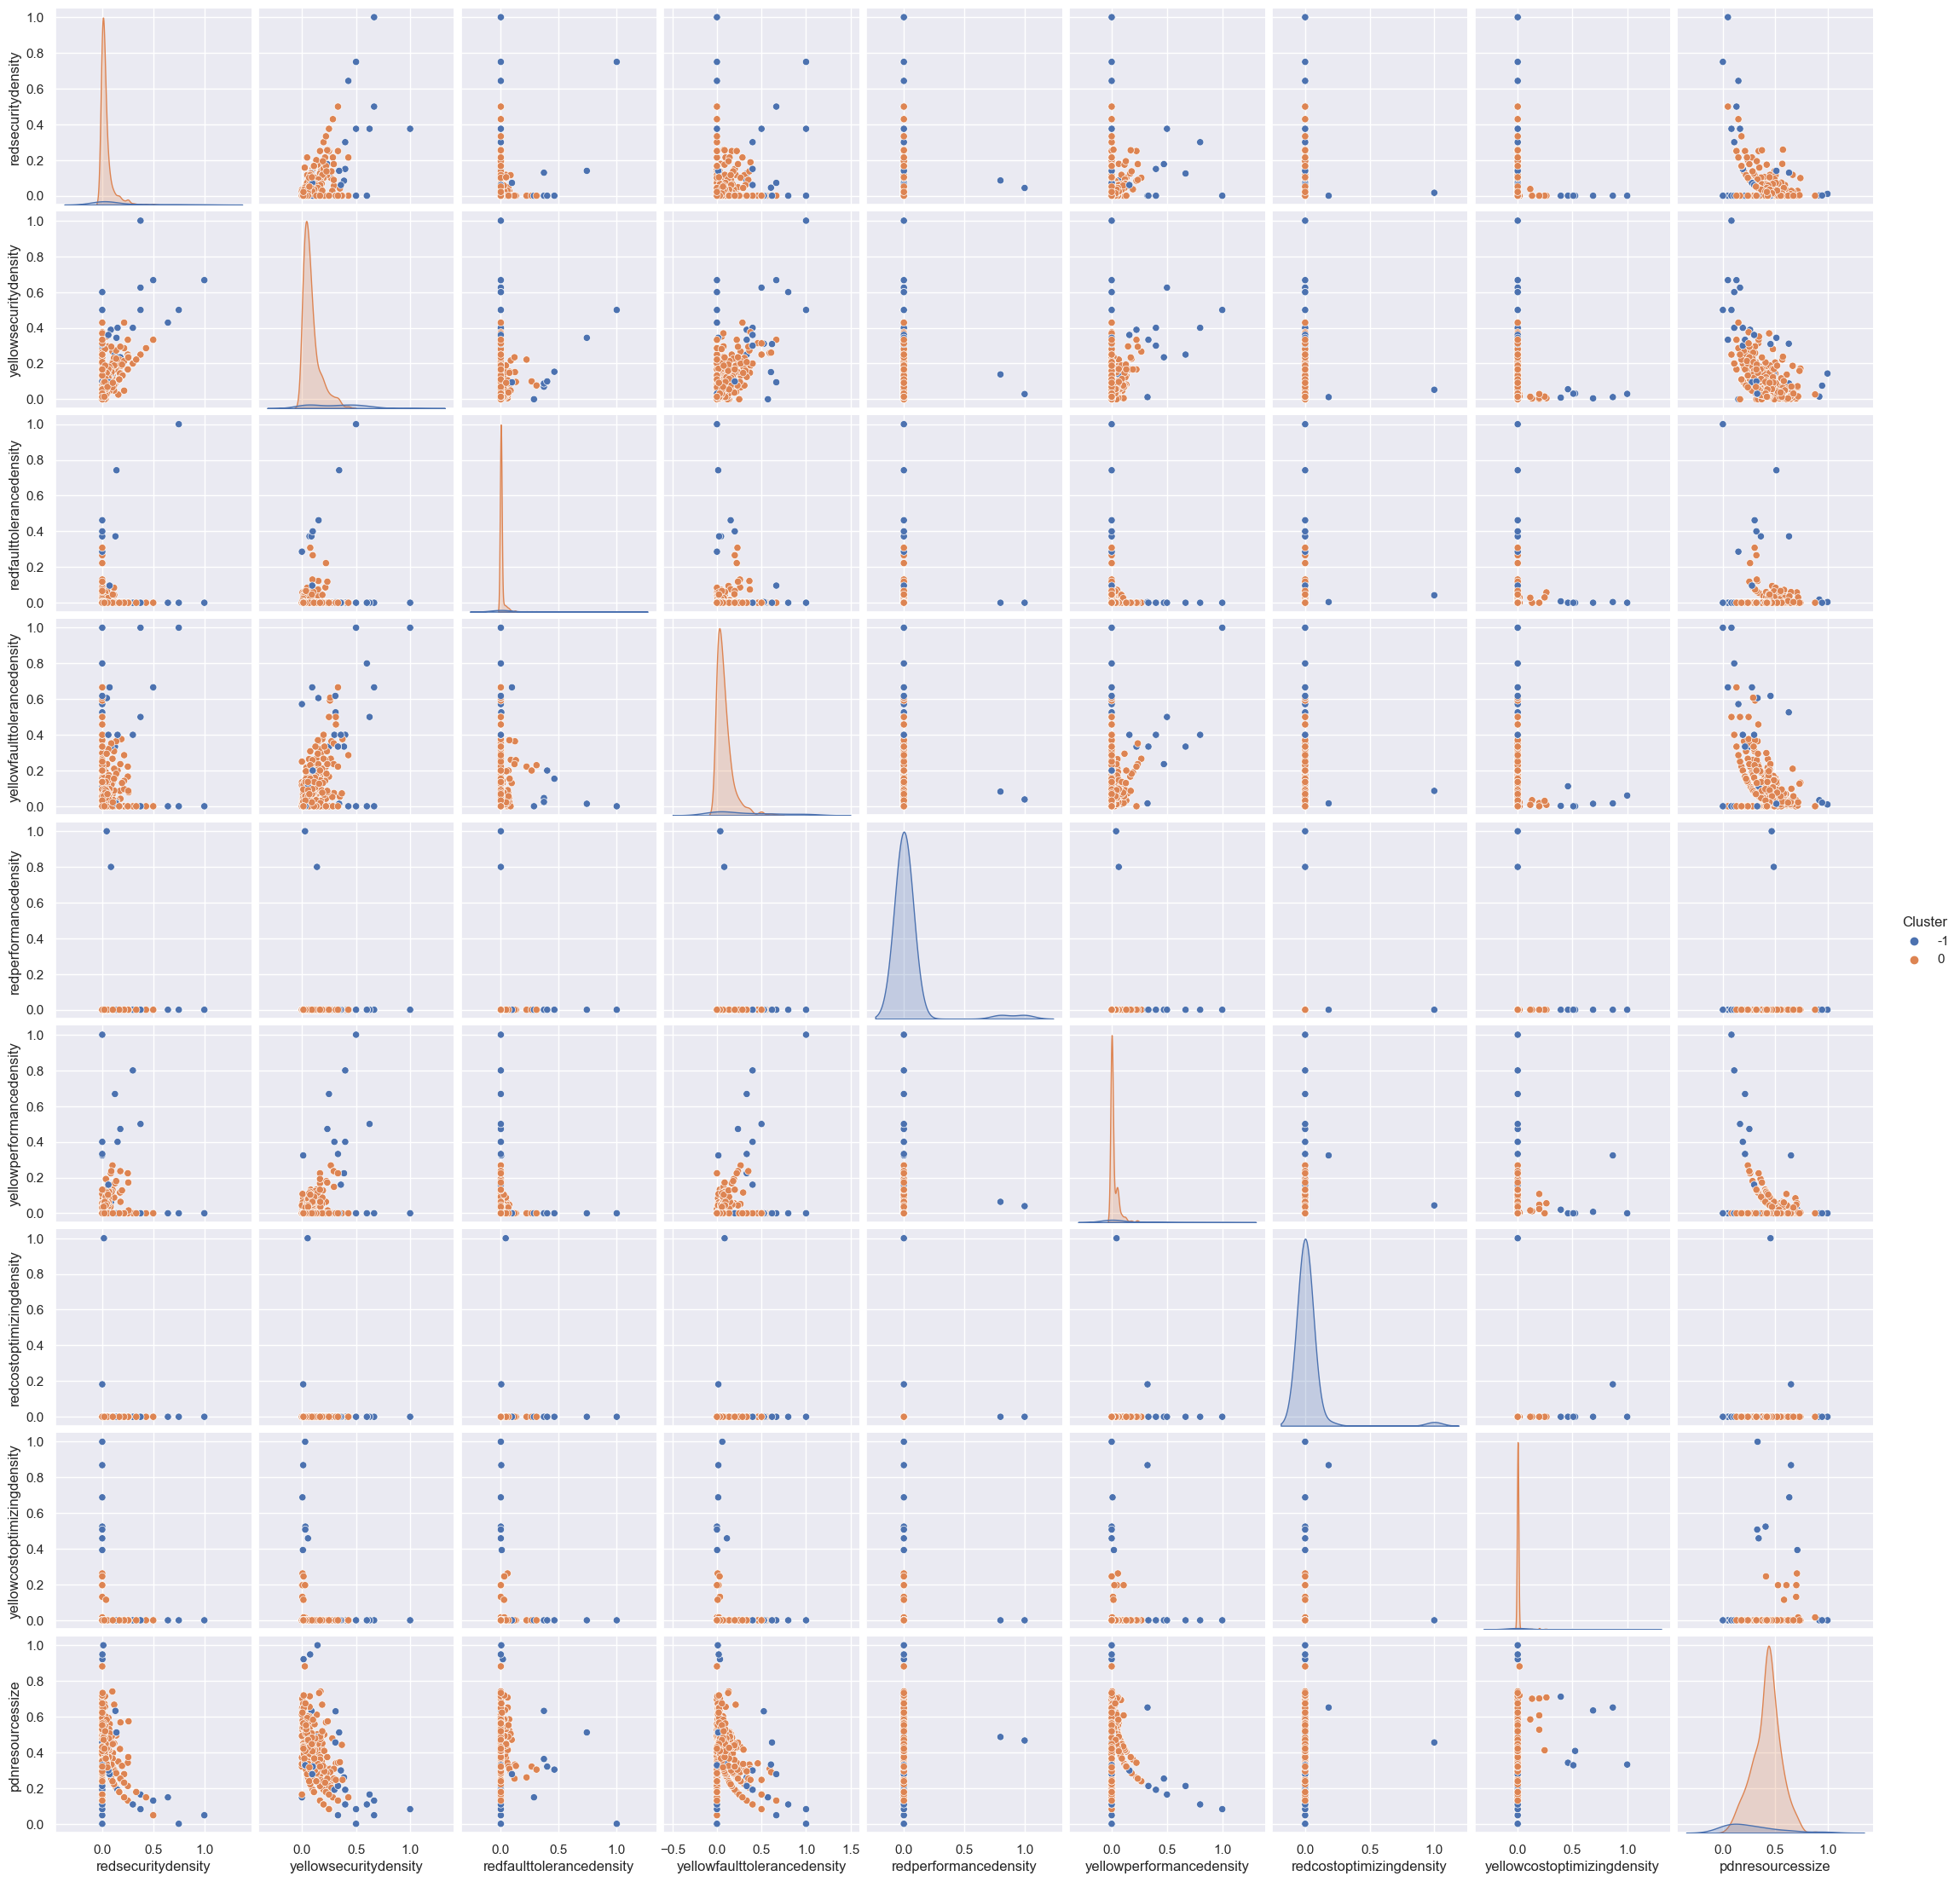

In [207]:
# pairplot
sns.pairplot(df0_scaled, hue="Cluster", palette="deep")

In [208]:
# calculate the mean of every cluster
df0_scaled.groupby('Cluster').mean().T

C:\Users\fede_\AppData\Local\Temp\ipykernel_10528\2151126050.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df0_scaled.groupby('Cluster').mean().T


Cluster                            -1         0
redsecuritydensity           0.159515  0.036515
yellowsecuritydensity        0.308340  0.085663
redfaulttolerancedensity     0.071887  0.006723
yellowfaulttolerancedensity  0.340302  0.082982
redperformancedensity        0.033962  0.000000
yellowperformancedensity     0.102943  0.019337
redcostoptimizingdensity     0.022298  0.000000
yellowcostoptimizingdensity  0.083823  0.002749
pdnresourcessize             0.279128  0.417858

In [66]:
# results interpretation
# cluster 4
df0[df0['Cluster'] == 4].describe()



pdnresourcescount  redsecuritydensity  yellowsecuritydensity  \
count          99.000000           99.000000              99.000000   
mean           22.676768            0.068808               0.249545   
std            21.463224            0.089540               0.095114   
min             3.000000            0.000000               0.095000   
25%             7.000000            0.000000               0.173000   
50%            16.000000            0.034000               0.227000   
75%            27.000000            0.117000               0.313500   
max            94.000000            0.429000               0.600000   

       redfaulttolerancedensity  yellowfaulttolerancedensity  \
count                 99.000000                    99.000000   
mean                   0.006566                     0.109303   
std                    0.027860                     0.097177   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.100000   
75%                    0.000000                     0.167000   
max                    0.231000                     0.333000   

       redperformancedensity  yellowperformancedensity  \
count                   99.0                 99.000000   
mean                     0.0                  0.016121   
std                      0.0                  0.035088   
min                      0.0                  0.000000   
25%                      0.0                  0.000000   
50%                      0.0                  0.000000   
75%                      0.0                  0.017000   
max                      0.0                  0.200000   

       redcostoptimizingdensity  yellowcostoptimizingdensity  \
count                      99.0                         99.0   
mean                        0.0                          0.0   
std                         0.0                          0.0   
min                         0.0                          0.0   
25%                         0.0                          0.0   
50%                         0.0                          0.0   
75%                         0.0                          0.0   
max                         0.0                          0.0   

       pdnresourcescountlog  Cluster  
count             99.000000     99.0  
mean               2.743312      4.0  
std                0.884476      0.0  
min                1.098612      4.0  
25%                1.945910      4.0  
50%                2.772589      4.0  
75%                3.295837      4.0  
max                4.543295      4.0

In [67]:
df0[df0['Cluster'] == 3].mean()

C:\Users\fede_\AppData\Local\Temp\ipykernel_22460\2453251699.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0[df0['Cluster'] == 3].mean()


pdnresourcescount              114.244068
redsecuritydensity               0.014417
yellowsecuritydensity            0.054936
redfaulttolerancedensity         0.003875
yellowfaulttolerancedensity      0.030793
redperformancedensity            0.000061
yellowperformancedensity         0.004769
redcostoptimizingdensity         0.000037
yellowcostoptimizingdensity      0.000224
pdnresourcescountlog             4.633711
Cluster                          3.000000
dtype: float64

In [97]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df0.drop(columns=['applicationcode', 'pdnresourcescountlog']))
df0 = pca.transform(df0.drop(columns=['applicationcode', 'pdnresourcescountlog']))
pca.explained_variance_ratio_

KeyError: "['pdnresourcescountlog'] not found in axis"

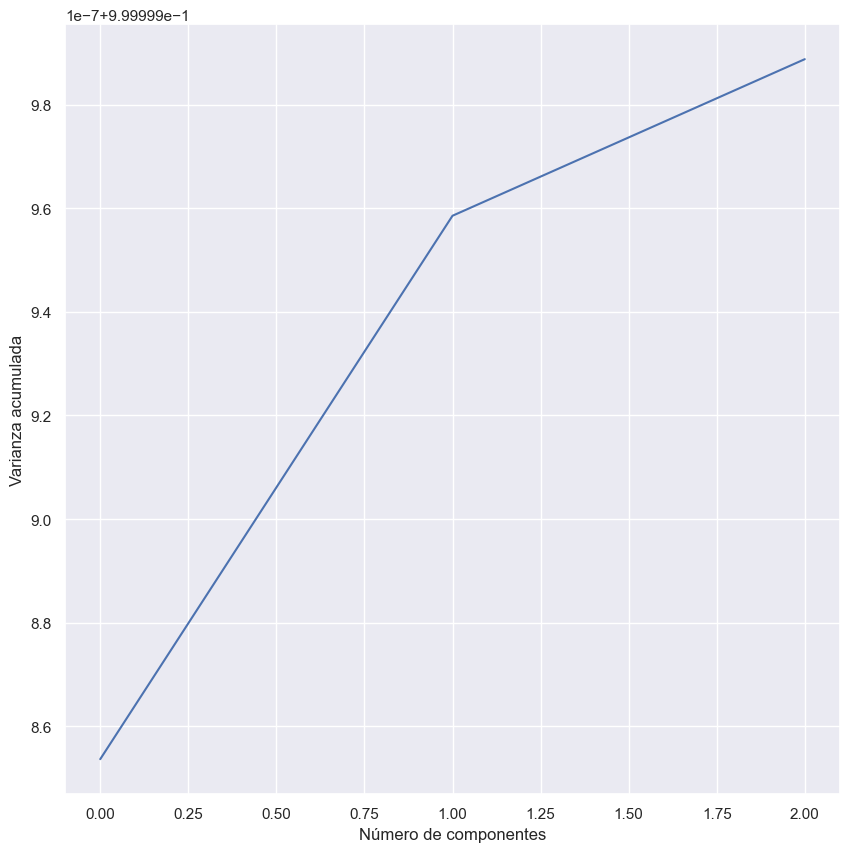

In [75]:
# plot pca
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()


In [90]:
df0 = pd.DataFrame(df0, columns=['pca1', 'pca2', 'pca3'])
df0

pca1      pca2      pca3
0    -81.321116  0.067221  0.016691
1    -35.321116  0.078865 -0.045119
2   -116.321116  0.087770  0.134541
3   -126.321112 -0.110322  0.006934
4    -74.321113 -0.071510  0.022487
..          ...       ...       ...
677  -34.321113 -0.082416  0.008056
678 -126.321112 -0.110322  0.006934
679 -125.321112 -0.110301  0.006933
680 -121.321112 -0.110219  0.006928
681 -118.321112 -0.110157  0.006924

[682 rows x 3 columns]

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axi

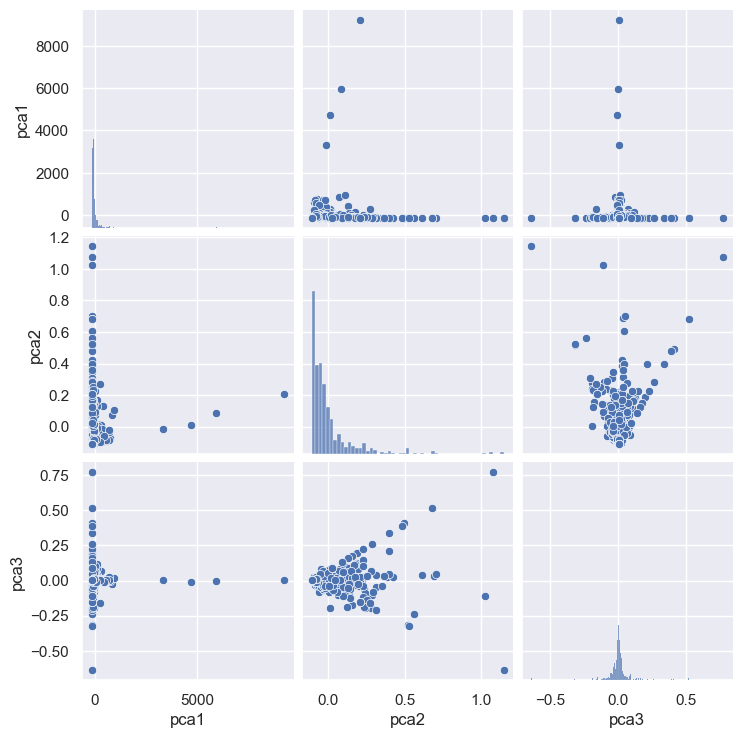

In [93]:
# plot df0
sns.pairplot(df0, palette="deep")


In [95]:
# kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df0['Cluster'] = kmeans.fit_predict(df0)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
sns.pairplot(data=df0, hue="Cluster", palette="deep")